Considering I have downloaded the zip files, i.e., clinicaltrial_2023 and pharma from the assignment brief and uploaded both of them on the definite path location. Now, in order to copy files from one location to another, lets use the databricks utilities to inetract with it: 

In [0]:
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

Out[1]: True

In [0]:

%sh
ls /tmp/
#Run a shell script so as to lists the contents of the /tmp/ directory to check the presence of the tables we just uploaded.


Rserv
Rtmp0Yanez
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-0badb3befbea4e99839512e184fef401-apache2.service-dJgYRi
systemd-private-0badb3befbea4e99839512e184fef401-ntp.service-T2nQ0e
systemd-private-0badb3befbea4e99839512e184fef401-systemd-logind.service-7st3Ei
systemd-private-0badb3befbea4e99839512e184fef401-systemd-resolved.service-xEVmof
tmp.r0ik4R20cr


In [0]:
%sh
unzip -d /tmp/ /tmp/pharma.zip
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip


Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         
Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:

%sh
ls /tmp/pharma.csv
ls /tmp/clinicaltrial_2023.csv

#check whether the files are present in the /tmp/ path or not


/tmp/pharma.csv
/tmp/clinicaltrial_2023.csv


In [0]:
#create a directory on the name pharma.csv

dbutils.fs.mkdirs("FileStore/tables/pharma.csv")
# "dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023.csv") -- not using this command since there is already the file present in the path because by mistake have already stored in it at initial stage of doing the assignment. Since, can't change the file name. keeping the stored file path as it is! Hence, we dont have to create the directory."

Out[5]: True

In [0]:
# Now, we can move the file from temp folder to the needed one
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)

Out[6]: True

In [0]:
#check the existence of the file in the path location

dbutils.fs.ls("FileStore/tables/pharma.csv/")

Out[7]: [FileInfo(path='dbfs:/FileStore/tables/pharma.csv/pharma.csv', name='pharma.csv', size=678999, modificationTime=1714595146000)]

In [0]:
# to list the contents of the directory

In [0]:
%fs ls /FileStore/tables/pharma.csv 

path,name,size,modificationTime
dbfs:/FileStore/tables/pharma.csv/pharma.csv,pharma.csv,678999,1714595146000


In [0]:
# let's name the RDD as "pharma_rdd"
pharma_rdd = sc.textFile("FileStore/tables/pharma.csv/")

# Display the first few rows of the pharma_rdd
pharma_rdd.take(5)

Out[9]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the co

In [0]:
# let's name the RDD as "clinicaltrial_2023_rdd"
clinicaltrial_2023_rdd = sc.textFile("FileStore/tables/clinicaltrial_2023.csv/")

# Display the first few rows of the clinicaltrial_2023_rdd
clinicaltrial_2023_rdd.take(5)

Out[10]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# Check the first row of pharma_Rdd and print its values
column_names_pharma = pharma_rdd.first()
print("column names values - pharma_rdd :", column_names_pharma)

column names values - pharma_rdd : "Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"


In [0]:
# Assuming pharma_rdd is your RDD
row_count = pharma_rdd.count()

print("Row count of pharma_with_none_notes RDD:", row_count)


Row count of pharma_with_none_notes RDD: 969


In [0]:
# Read the data into the name "clinicaltrial_2023_rdd"

clinicaltrial_2023_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")

In [0]:
# Check the first row and print its values
column_names_clinicaltrial = clinicaltrial_2023_rdd.first()
print("First row values:", column_names_clinicaltrial)

First row values: "Id	Study Title	Acronym	Status	Conditions	Interventions	Sponsor	Collaborators	Enrollment	Funder Type	Type	Study Design	Start	Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [0]:
# lets do the data preparation and cleansing on the table clinicaltrial_2023 to make it ready for the tasks

# Each line in the RDD is a string containing tab-separated values, and the lambda function splits each line into a list of values.
clinicaltrial_2023_parsed_data_rdd = clinicaltrial_2023_rdd.map(lambda line: line.split("\t"))

# define a function for extracting the variables from the first column
def parse_first_column(row):
    columns = row[0].split("|")
    return (columns,) + tuple(row[1:]) #-- this returns a tuple containing all the column values with the extracted first column along with it

# Now, in order to apply the parsing function to each row
clinicaltrial_2023_structured_data_rdd = clinicaltrial_2023_parsed_data_rdd.map(parse_first_column)

#Printing first few rows in order to check whether the pasing have been successfully done or not.
clinicaltrial_2023_structured_data_rdd.take(5)

Out[15]: [(['"Id'],
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'),
 (['"NCT03630471'],
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR

In [0]:
# Since, there are extra unwanted commas and quotes present in our parsed dataset, we need to remove it from each row

clinicaltrial_2023_cleaned_data_rdd = clinicaltrial_2023_parsed_data_rdd.map(lambda row: [field.replace(',', '').replace('"', '') for field in row])

# view first few rows to check and confirm the data cleansing have successfully implemented
clinicaltrial_2023_cleaned_data_rdd.take(5)

Out[16]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

In [0]:
#Now, next stage in data preparation is removing the missing values in the dataset. To check the presence of missing values in the dataset, let's define a function:

def check_missing_values(dataset):
    missing_values = dataset.filter(lambda row: '' in row)
    if missing_values.isEmpty():
        print("No missing values")
    else:
        print("Yes")
        for row in missing_values.collect():
            print(row)

# Call the function with the clinicaltrial_2023_cleaned_data_rdd in order to call out the missing values in the cleaned data RDD
check_missing_values(clinicaltrial_2023_cleaned_data_rdd)

# Now to remove these missing values with none instead: 
clinicaltrial_2023_cleaned_data_rdd_with_none = clinicaltrial_2023_cleaned_data_rdd.map(lambda row: [None if value == '' else value for value in row])

# View the first few rows in order to confirm that the missing values have been removed from the cleaned RDD
clinicaltrial_2023_cleaned_data_rdd_with_none.take(5)

Yes
['NCT05992571', 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', '', 'RECRUITING', 'Cerebrovascular Function|Cognition', 'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB', 'McMaster University', "Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton", '30.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE', '2023-10-25', '2024-08']
['NCT00237471', 'Impact of Tight Glycaemic Control in Acute Myocardial Infarction', '', 'TERMINATED', 'Myocardial Infarct|Hyperglycemia', 'DRUG: Insulin (tight blood glucose control)', 'Melbourne Health', 'National Health and Medical Research Council Australia|Bristol-Myers Squibb', '40.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT', '2005-10', '2006-05']
['NCT03820271', 'New Prognostic Predictive Models of Mortality of De

In [0]:
# to double confirm that the missing values have been removed from the RDD, lets call the function again:
check_missing_values(clinicaltrial_2023_cleaned_data_rdd_with_none)

No missing values


In [0]:
# Assuming your clinicaltrial_2023_cleaned_data_rdd_with_none contains the data as an RDD

# Get the count of data rows in the RDD
row_count = clinicaltrial_2023_cleaned_data_rdd_with_none.count()

# Display the count
print("Number of data rows in the clinicaltrial_2023_cleaned_data_rdd_with_none:", row_count)

Number of data rows in the clinicaltrial_2023_cleaned_data_rdd_with_none: 483423


In [0]:
#Now let's start the deep analysis of each row to find whether all the data values are getting in each column is as per the requirement so as to continue with the data in-depth analysis

# Extract the values of the first column from each row
Id = clinicaltrial_2023_cleaned_data_rdd_with_none.map(lambda row: row[0])

# Display the first column values
for value in Id.collect():
    print(value)

Id
NCT03630471
NCT05992571
NCT00237471
NCT03820271
NCT06229171
NCT02945371
NCT01055171
NCT01125371
NCT02554071
NCT01772771
NCT02633371
NCT03400371
NCT00120471
NCT04784871
NCT02383771
NCT03269071
NCT01659671
NCT04765371
NCT02830971
NCT00416871
NCT05900271
NCT02469571
NCT05807971
NCT02083471
NCT01062971
NCT03928171
NCT00897871
NCT00848471
NCT06135571
NCT01189071
NCT00728871
NCT05592171
NCT00520871
NCT05913271
NCT04006171
NCT04370171
NCT04340271
NCT03075371
NCT05966571
NCT03313271
NCT03490071
NCT05801471
NCT00266071
NCT04405271
NCT02121171
NCT01068171
NCT04875871
NCT00553371
NCT04674371
NCT02321371
NCT02344771
NCT03354871
NCT02804971
NCT04591171
NCT04814771
NCT00991471
NCT05702671
NCT02069171
NCT00474071
NCT02022371
NCT04585971
NCT05473871
NCT01523171
NCT00000571
NCT01053871
NCT02370771
NCT05974371
NCT03713671
NCT02645071
NCT04004871
NCT05953571
NCT02570971
NCT03987971
NCT01425671
NCT04962971
NCT02827071
NCT04236271
NCT01780571
NCT05078671
NCT02529371
NCT02309671
NCT03876171
NCT05031871
N

In [0]:
# to ckec whether the column contains only 11 characters, since the Id is a 11 character Alphanumeric value, viewing the header row
header_row = clinicaltrial_2023_cleaned_data_rdd_with_none.first()

# let's define a function to check if the value has 11 characters
def check_id_length(row):
    id_value = row[0]
    return len(id_value) == 11

# Check if all values in the "Id" column have 11 characters
all_ids_correct = clinicaltrial_2023_cleaned_data_rdd_with_none.filter(lambda row: row != header_row).map(check_id_length).reduce(lambda x, y: x and y)

if all_ids_correct:
    print("All values in the 'Id' column have 11 characters.")
else:
    print("Not all values in the 'Id' column have 11 characters.")


Not all values in the 'Id' column have 11 characters.


In [0]:
# Lets define a Function to check if the value has 11 characters and return the row if not
def check_id_length_and_return(row):
    id_value = row[0]
    if len(id_value) != 11:
        return row
    return None

# Check if all values in the "Id" column have 11 characters
invalid_ids = clinicaltrial_2023_cleaned_data_rdd_with_none.filter(lambda row: row != header_row).map(check_id_length_and_return).filter(lambda x: x is not None).collect()

if not invalid_ids:
    print("All values in the 'Id' column have 11 characters.")
else:
    print("Rows where 'Id' column doesn't have 11 characters:")
    for row in invalid_ids:
        print(row)

Rows where 'Id' column doesn't have 11 characters:
['taluña|Public Health Service of Madrid|Public Health Service of Galicia|Cantabria Health Service', '97.0', 'OTHER_GOV', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2005-01', '2010-06']


In [0]:
# Hence, we need to remove the row since there is no significance in the row without a distinct Id column in it

target_data = ['taluña|Public Health Service of Madrid|Public Health Service of Galicia|Cantabria Health Service', '97.0', 'OTHER_GOV', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2005-01', '2010-06']

# Adding index to each row
indexed_rdd = clinicaltrial_2023_cleaned_data_rdd_with_none.zipWithIndex()

# Filter the indexed RDD to find the row containing the target data
result = indexed_rdd.filter(lambda row: row[0] == target_data).collect()

# Check if any rows match the target data
if result:
    for row in result:
        print("Row number:", row[1] + 1) 
        print("Row data:", row[0])
else:
    print("Target data not found in the RDD.")

Row number: 293058
Row data: ['taluña|Public Health Service of Madrid|Public Health Service of Galicia|Cantabria Health Service', '97.0', 'OTHER_GOV', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2005-01', '2010-06']


In [0]:
# since the row without ID is in the Extract column names from the first row
column_names = clinicaltrial_2023_cleaned_data_rdd_with_none.first()

# Filter out rows where the 'Id' column doesn't have 11 characters
filtered_rdd = clinicaltrial_2023_cleaned_data_rdd_with_none.filter(lambda row: len(row[0]) == 11)

# Prepend the column attribute names to the filtered data
filtered_data_with_header = [column_names] + filtered_rdd.collect()

# Convert the filtered data with header into an RDD
filtered_rdd_with_header = sc.parallelize(filtered_data_with_header)
filtered_rdd_with_header.take(5)

Out[24]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  None,
  'RECRUITING',
  'Cerebrovascular F

In [0]:
#To confirm that we filtered the row without ID column
# Extract the header row
header_row = filtered_rdd_with_header.first()

# Function to check if the value has 11 characters and return the row if not
def check_id_length_and_return(row):
    id_value = row[0]
    if len(id_value) != 11:
        return row
    return None

# Check if all values in the "Id" column have 11 characters
invalid_ids = filtered_rdd_with_header.filter(lambda row: row != header_row).map(check_id_length_and_return).filter(lambda x: x is not None).collect()

if not invalid_ids:
    print("All values in the 'Id' column have 11 characters.")
else:
    print("Rows where 'Id' column doesn't have 11 characters:")
    for row in invalid_ids:
        print(row)

All values in the 'Id' column have 11 characters.


In [0]:

#just to double confirm that only required rows are coming in the dataset 
# Add index to each row
rows_with_index = filtered_rdd_with_header.zipWithIndex()

# Filter rows where 'Id' column contains 'Id' and is not None
rows_with_valid_type = rows_with_index.filter(lambda row_index: row_index[0][0] and 'Id' in row_index[0][0])

# Print the row number and rows
for row_index, row in rows_with_valid_type.collect():
    print("Row number:", row_index)
    print("Row content:", row)

Row number: ['Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion']
Row content: 0


In [0]:
# To get the values of the second column from each row of the final RDD filtered_rdd_with_header

study_title = filtered_rdd_with_header.map(lambda row: row[1])

# Display the first column values
for value in study_title.collect():
    print(value)

Study Title
Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India
Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity
Impact of Tight Glycaemic Control in Acute Myocardial Infarction
New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation
InTake Care: Development and Validation of an Innovative Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention
Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life
Neuromodulation of Trauma Memories in PTSD & Alcohol Dependence
Computerized Brief Alcohol Intervention (BI) for Binge Drinking HIV At-Risk and Infected Women
Manitoba Pharmacist Initiated Smoking Cessation Pilot Project
Molecular Testing for the MD Anderson Cancer Center Personalized Cancer Therapy Program
A Pilot Study Exploring the Efficacy and Safety of Topical Oxybutynin 3% Gel for Prima

In [0]:
# To get the values of the third column from each row of the final RDD filtered_rdd_with_header

acronym = filtered_rdd_with_header.map(lambda row: row[2])

# Display the first column values
for value in acronym.collect():
    print(value)

Acronym
PRIDE
None
None
SUPERMELD
InTakeCare
REV
None
None
None
None
None
BIOJUME
None
5WaysA
REVERSAL
STEMS
SKUP3
COPreDex
None
None
DDOT
MGM-sepsis
None
None
None
PERFUSION
None
Protocol Quark
None
None
None
SEASON-HCC
None
None
CNP
TeleCoviDiab
None
None
None
CLAP
Lund LHGP
None
None
None
None
None
PARTICLE-PATHY
None
None
None
None
IoT4Resident
BRONCOCA
None
None
MDRNSTAT
None
None
None
PROGENY
None
None
JAKARTA2
None
None
PASEO
None
None
None
None
None
None
None
None
None
None
TELE-PEACE
None
PROACTIVE
None
None
None
None
None
None
None
None
None
DEN-STEM
None
None
None
None
None
None
DER-CoV2-001
DCAP
None
None
None
BRISK FL
None
None
None
None
None
None
HERNIA
ODINE
None
None
DIRECTION
None
None
None
None
None
None
None
None
MTSA
None
None
ASAPP
None
None
None
SB-OSAS
None
None
FAVoR
None
None
None
None
None
None
LDC
TASHE
WSF
None
None
PrEPPED
CAREAVR
HIDIT-II
SLA
None
None
ANDHI
None
None
None
None
None
None
DRAGON
None
None
None
None
BIFI
None
PRIME
LT
PARTEM
GRGDG
None
EchoL

In [0]:
# I guess, as per I looked into the dataset, the List of expected values in the fourth column are:
expected_values = {'Status', 'COMPLETED', 'ACTIVE_NOT_RECRUITING', 'RECRUITING', 'NOT_YET_RECRUITING', 'UNKNOWN', 'WITHDRAWN', 'NO_LONGER_AVAILABLE', 'ENROLLING_BY_INVITATION', 'SUSPENDED', 'AVAILABLE', 'WITHHELD', 'TEMPORARILY_NOT_AVAILABLE', 'APPROVED_FOR_MARKETING','TERMINATED'}

# Convert the set of expected values to an RDD
expected_values_rdd = sc.parallelize(expected_values)

# Extract the values of the forth column from each row
status = filtered_rdd_with_header.map(lambda row: row[3])

# Check for values other than the expected ones
other_values_rdd = status.subtract(expected_values_rdd)

# Collect the other values found
other_values = other_values_rdd.collect()

# Print any other values found - just to make sure that only these values are coming in the forth column - status
if other_values:
    print("Other values found:")
    for value in other_values:
        print(value)
else:
    print("No other values found.")

No other values found.


In [0]:
# To get the values of the fifth column from each row of the final RDD filtered_rdd_with_header

conditions = filtered_rdd_with_header.map(lambda row: row[4])

# Display the first column values
for value in conditions.collect():
    print(value)

Conditions
Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)
Cerebrovascular Function|Cognition
Myocardial Infarct|Hyperglycemia
Decompensated Cirrhosis|Liver Transplantation
Hypertension|Treatment Adherence and Compliance|Digital Health
Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced
Alcohol Dependence|PTSD
Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection
Smoking Cessation
Glioma|Hematopoietic and Lymphoid Cell Neoplasm|Malignant Solid Neoplasm|Melanoma|Sarcoma
Hyperhidrosis
Juvenile Myoclonic Epilepsy
HIV Infections
Wellbeing|Health Attitude|Quality of Life
Coronary Artery Disease
Progressive Multiple Sclerosis
Obstructive Sleep Apnea Syndrome
Coronavirus Infection
Registered Nurses|Nursing Personnel|Motor Skills
Kidney Cancer
Treatment Resistant Depression
Sepsis
Inflammatory Bowel Diseases|Crohn Disease|Ulcerative Colitis|Autoimmune Diseases
Egg Allergy|Cow's Milk Allergy
Primary Open

In [0]:
# To get the values of the sixth column from each row of the final RDD filtered_rdd_with_header

interventions = filtered_rdd_with_header.map(lambda row: row[5])

# Display the first column values
for value in interventions.collect():
    print(value)

Interventions
BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care
OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB
DRUG: Insulin (tight blood glucose control)
OTHER: SuperMELD
OTHER: adherence support system based on a vocal assistant
BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training
DRUG: Propranolol|DRUG: Placebo
BEHAVIORAL: Computerized brief alcohol intervention + IVR booster calls|BEHAVIORAL: Computerized brief alcohol intervention|BEHAVIORAL: Attention Control
OTHER: Pharmacist - Smoking Cessation Support
PROCEDURE: Biospecimen Collection|OTHER: Genetic Testing|OTHER: Medical Chart Review
DRUG: Oxybutynin 3% gel
OTHER: Blood draw|OTHER: Existing samples
DRUG: Tenofovir disoproxil fumarate|DRUG: Tenofovir disoproxil fumarate|DRUG: Tenofovir disoproxil fumarate
BEHAVIORAL: 5waysA Intervention|BEHAVIORAL: 5waysA Active wait-list control|BEHAVIORAL: 5waysA Inactive wait-list control
DRUG: Ticagrelor|DRU

In [0]:
# To get the values of the seventh column from each row of the final RDD filtered_rdd_with_header

sponsor = filtered_rdd_with_header.map(lambda row: row[6])

# Display the first column values
for value in sponsor.collect():
    print(value)

Sponsor
Sangath
McMaster University
Melbourne Health
Assistance Publique - Hôpitaux de Paris
Istituto Auxologico Italiano
University of Oregon
Medical University of South Carolina
Johns Hopkins University
University of Manitoba
M.D. Anderson Cancer Center
University of Colorado Denver
King's College London
National Institute of Allergy and Infectious Diseases (NIAID)
University of Oslo
The First Affiliated Hospital with Nanjing Medical University
IRCCS San Raffaele
Karolinska University Hospital
Hôpital NOVO
Baqiyatallah Medical Sciences University
Centre Leon Berard
Amsterdam UMC location VUmc
Medical University of Graz
Athos Therapeutics Inc
Turku University Hospital
Laboratorios Sophia S.A de C.V.
Radboud University Medical Center
Children's Cancer and Leukaemia Group
Hospices Civils de Lyon
Cancer Institute and Hospital Chinese Academy of Medical Sciences
University of Missouri-Columbia
National Taiwan University Hospital
University of Pisa
University of Oslo
Yi Han
Near East Unive

In [0]:
# To get the values of the eight column from each row of the final RDD filtered_rdd_with_header

collaborators = filtered_rdd_with_header.map(lambda row: row[7])

# Display the first column values
for value in collaborators.collect():
    print(value)

Collaborators
Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine
Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton
National Health and Medical Research Council Australia|Bristol-Myers Squibb
None
Istituti Clinici Scientifici Maugeri SpA|Politecnico di Milano
None
National Institute on Alcohol Abuse and Alcoholism (NIAAA)
National Institute on Alcohol Abuse and Alcoholism (NIAAA)
Govenment of Manitoba|Canadian Foundation for Pharmacy|Neighbourhood Pharmacy Association of Canada
National Cancer Institute (NCI)
Society for Pediatric Dermatology
King's College Hospital NHS Trust|Charles University Czech Republic|Hopital Universitaire Robert-Debre|Vestre Viken Hospital Trust|The Hospital for Sick Children|Cardiff University|Odense University Hospital
Eunice Kennedy Shriver National Institute of Child Health and Human Development (NICHD)|National Institute on Drug Abuse (NIDA)|National Institute of Mental Health (NIMH)
Norwegian Institute of Pub

In [0]:
# Extract the values of the ninth column from each row
enrollment = filtered_rdd_with_header.map(lambda row: row[8] if len(row) > 8 else None)

# Display the ninth column values
for value in enrollment.collect():
    print(value)

Enrollment
250.0
30.0
40.0
500.0
206.0
103.0
44.0
439.0
119.0
12000.0
10.0
1000.0
122.0
970.0
64.0
4.0
65.0
89.0
60.0
220.0
108.0
15.0
76.0
40.0
124.0
30.0
60.0
30.0
3000.0
3.0
600.0
60.0
62.0
352.0
90.0
610.0
48.0
85.0
50.0
5000.0
81.0
200.0
None
1378.0
40.0
0.0
22.0
300.0
537.0
73.0
31.0
6.0
200.0
9.0
6.0
6300.0
411.0
333.0
60.0
50.0
30.0
812.0
97.0
None
104.0
32.0
150.0
40.0
141.0
60.0
65.0
200.0
114.0
800.0
216.0
1000.0
33.0
44.0
160.0
30.0
159.0
44.0
24.0
30.0
180.0
1495.0
24.0
10.0
60.0
20.0
60.0
150.0
30.0
4796.0
163.0
50.0
34.0
30.0
1.0
32.0
1714.0
16.0
7260.0
357.0
60.0
50.0
231.0
15.0
50.0
65.0
50.0
5.0
150.0
124.0
100.0
92.0
79.0
30.0
15.0
74.0
21.0
10.0
384.0
86.0
12.0
114.0
48.0
45.0
57.0
480.0
178.0
31.0
102.0
78.0
72.0
12.0
115.0
89.0
290.0
100.0
470.0
70.0
26.0
850.0
70.0
136.0
8.0
22.0
660.0
59.0
78.0
46.0
600.0
None
228.0
364.0
18.0
180.0
266.0
30.0
413.0
96.0
40.0
20.0
90.0
30.0
5000.0
2000.0
400.0
60.0
45.0
279.0
0.0
60.0
3720.0
100.0
None
17.0
150.0
492.0
170.0
170

In [0]:
#Since the datatype of the column named "enrollment" ahouls be float since there are only float values coming in it, let's define a function to convert a value to float, handling None values
def safe_float_conversion(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None  # Return None for non-numeric values or None

# Apply the function to convert the "enrolllment" columns to float
converted_rdd = filtered_rdd_with_header.map(lambda row: [safe_float_conversion(val) if idx in [8] else val for idx, val in enumerate(row)])

# to confirm the value is changed to float datatype
print(converted_rdd.take(5))


[['Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', None, 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion'], ['NCT03630471', 'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India', 'PRIDE', 'COMPLETED', 'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)', "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care", 'Sangath', 'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine', 250.0, 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2018-08-20', '2019-02-28'], ['NCT05992571', 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', None, 'RECRUITING', 'Cerebrovascular Function|Cognition', 'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB', 'McMaster Univers

In [0]:
# To get the values of the column "Funder Type" from each row of the dataset filtered_rdd_with_header
funder_type = filtered_rdd_with_header.map(lambda row: row[9] if len(row) > 9 else None)

# to View the values
for value in funder_type.collect():
    print(value)

Funder Type
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
NIH
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER_GOV
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER_GOV
OTHER
OTHER_GOV
OTHER
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER_GOV
OTHER
OTHER
INDUSTRY
OTHER
INDUSTRY
OTHER_GOV
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER
OTHER
OTHER
OTHER
INDUSTRY
INDUSTRY
OTHER
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER
OTHER_GOV
OTHER
NIH
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER
INDUSTRY
OTHER
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
NIH
OTHER
OTHER
INDUSTRY
INDUSTRY
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
OTHER
INDUSTRY
OTHER
OTHER
INDUSTRY
OTHER
INDUSTRY
OTHER
OTHER
FED
OTHER
OTHER
OTHER
OTHER
NETWORK
OTHER
OTHER
OTHER
INDUSTRY
INDUSTRY
OTHE

In [0]:
# to get the values of the column Type from each row of the dataset filtered_rdd_with_header
type = filtered_rdd_with_header.map(lambda row: row[10] if len(row) > 10 else None)

# Display the tenth column values
for value in type.collect():
    print(value)

Type
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
OBSERVATIONAL
OBSERVATIONAL
OBSERVATIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
OBSERVATIONAL
INTERVENTIONAL
OBSERVATIONAL
OBSERVATIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
OBSERVATIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENTIONAL
INTERVENT

In [0]:
# To check there is only expected values coming in the column type so as to smoothly get the accurate result while doing analysis:
expected_values = {'OBSERVATIONAL', 'INTERVENTIONAL','EXPANDED_ACCESS',None,'Type'}
# Assuming your verified_rdd contains the data as an RDD

# Convert the set of expected values to an RDD
expected_values_rdd = sc.parallelize(expected_values)


# Check for values other than the expected ones
other_values_rdd = type.subtract(expected_values_rdd)

# Collect the other values found
other_values = other_values_rdd.collect()

# Print any other values found
if other_values:
    print("Other values found:")
    for value in other_values:
        print(value)
else:
    print("No other values found.")

No other values found.


In [0]:
# To get the values of the column "Study Design" from each row of the dataset RDD filtered_rdd_with_header
study_design = filtered_rdd_with_header.map(lambda row: row[11] if len(row) > 11 else None)

# Display the ninth column values
for value in study_design.collect():
    print(value)

Study Design
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT
Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT
Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: OTHER
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: OTHER
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT CARE_PROVIDER INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT
Allocation: NA|Intervention Model: SINGLE_GROUP|Mask

In [0]:
# To get the values of the "start" column from each row of the dataset filtered_rdd_with_header
start = filtered_rdd_with_header.map(lambda row: row[12] if len(row) > 12 else None)

# Display the ninth column values
for value in start.collect():
    print(value)

Start
2018-08-20
2023-10-25
2005-10
2020-10-01
2024-10-01
2014-09
2010-01
2011-10
2014-01
2012-03-01
2016-02
2017-07-13
2006-11
2021-03-04
2015-03
2017-05-17
2007-06
2021-03-03
2016-07
None
2023-11-15
2015-09-01
2023-04-06
2015-04
2006-02
2018-06-13
2007-02
2009-01
2023-09-01
2009-08
2005-12
2022-10-17
2003-03
2023-05-30
2019-07-15
2020-05-04
2020-04-15
2014-09
2023-07-01
2017-05-17
2018-01-01
2022-05-06
2005-12
2020-07-31
2010-09
2010-05
2021-11-11
2006-04
2022-05-17
2014-10-19
2015-03
2017-11
2016-10-25
2021-01-25
2021-04-19
2009-09
2023-01-27
2012-06
2007-03
2014-09
2020-09-03
2022-11-15
2012-04
1986-02
2010-01
2015-06-09
2024-08
2021-10-17
2015-07
2019-07-05
2022-01-08
2015-10
2020-01
2010-11-30
2020-09-01
2016-07
2020-03-13
2009-05
2021-12-15
2015-09
2014-12
2019-04-01
2021-09-02
2019-11-10
2024-03-01
2010-03
2016-12-01
2016-04
2018-04-26
2011-10
2019-05-02
2023-01-22
2022-08-08
2004-02
2002-07
2021-07-22
2019-11-11
2024-01-31
2019-09-10
2022-12-20
2009-05
2013-02
2011-05
2007-09


In [0]:
# we can notice here that none values are coming, and two data formats of date value is coming in the dataset YYYY-MM-DD and YYYY-MM-DD. Hence we need to change this non-uniform data format into the standard one of YYYY-MM-DD. For, that, Assume all the data where YYYY-MM format started with the first day of the month given

# For achieving this, let's split the RDD into two --> start_with_none --> containing only none values in it and start_without_none --> containing the two other data formats.
start_with_none = filtered_rdd_with_header.filter(lambda row: len(row) > 12 and row[12] is None)

# Filter RDD to create start_without_none containing rows without None values in the thirteenth column
start_without_none = filtered_rdd_with_header.filter(lambda row: len(row) > 12 and row[12] is not None and row[12] != 'Start')

# Print the first_part_start RDD
print("Start column containing only none values):")
for row in start_with_none.collect():
    print(row)

# Print the second_part_start RDD
print("\nStart column containing values with the format YYYY-MM-DD and YYYY-MM):")
for row in start_without_none.collect():
    print(row)


Start column containing only none values):
['NCT00416871', 'Interleukin-2 and Interferon in Treating Patients With Metastatic Kidney Cancer', None, 'COMPLETED', 'Kidney Cancer', 'BIOLOGICAL: aldesleukin|BIOLOGICAL: recombinant interferon alfa', 'Centre Leon Berard', None, '220.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: |Masking: NONE|Primary Purpose: TREATMENT', None, '2006-02']
['NCT01637571', 'Dexilant Treatment in Gastrointestinal Reflux Disease (GERD Related Non Cardiac Chest Pain', 'Dexilant', 'WITHDRAWN', 'Chest Pain|Gastrointestinal Reflux Disease', 'DRUG: Dexilant|DRUG: Dexilant Placebo', 'University of Iowa', None, '0.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: TREATMENT', None, None]
['NCT00021671', 'Antibiotics to Reduce Chorioamnionitis-Related Perinatal HIV Transmission', None, 'COMPLETED', 'HIV Infections', 'DRUG: Erythromycin|DRUG: Nevirapine|DRUG: Ampic

In [0]:

# Get the count of data rows in the RDD
row_count = filtered_rdd_with_header.count()

# Display the count
print("Number of data rows in the filtered_rdd_with_header:", row_count)
# Get the count of data rows in the RDD
row_count = start_with_none.count()

# Display the count
print("Number of data rows in the start_with_none:", row_count)
# Get the count of data rows in the RDD
row_count = start_without_none.count()

# Display the count
print("Number of data rows in the start_without_none:", row_count)

Number of data rows in the filtered_rdd_with_header: 483422
Number of data rows in the start_with_none: 5144
Number of data rows in the start_without_none: 478276


In [0]:
# Convert lists into tuples for start_with_none and start_without_none RDDs
start_with_none_tuples = start_with_none.map(tuple)
start_without_none_tuples = start_without_none.map(tuple)

# Create a set of all rows in start_with_none and start_without_none RDDs
start_with_none_rows = set(start_with_none_tuples.collect())
start_without_none_rows = set(start_without_none_tuples.collect())

# Convert the original RDD into tuples
filtered_rdd_tuples = filtered_rdd_with_header.map(tuple)

# Create a set of all rows in filtered_rdd_with_header RDD
all_rows = set(filtered_rdd_tuples.collect())

# Find the rows that are not included in either start_with_none or start_without_none
not_in_either = all_rows - (start_with_none_rows.union(start_without_none_rows))

# Print the rows not included in either start_with_none or start_without_none
print("Rows not included in either start_with_none or start_without_none:")
for row in not_in_either:
    print(row)


Rows not included in either start_with_none or start_without_none:
('NCT00146315', 'ESCAP: Supervised Exercise for Patients With Coronary Heart Disease in the Primary Care Setting', None, 'COMPLETED', 'Coronary Heart Disease', 'BEHAVIORAL: Supervised exercise on a stationary bicycle 3-5 days a week|BEHAVIORAL: Secondary prevention program for coronary heart disease', 'Basque Health Service', 'Preventive Services and Health Promotion Research Network|Castilla-La Mancha Health Service|Castilla-León Health Service|Dalt Sant Joan primary care center (Balears Islans Health Service)|Public Health Service of C')
('Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion')


In [0]:
# Find the row where Id = NCT00146315 along with its index
matching_row_with_index = filtered_rdd_with_header.zipWithIndex() \
    .filter(lambda row_index: row_index[0][0] == 'NCT00146315') \
    .collect()

# Check if a matching row was found
if matching_row_with_index:
    # Extract the row and its index
    matching_row, index = matching_row_with_index[0]
    # Print the index and the row
    print("Index:", index)
    print("Row:", matching_row)
else:
    print("No row found with Id = NCT00146315 in filtered_rdd_with_header.")


Index: 293056
Row: ['NCT00146315', 'ESCAP: Supervised Exercise for Patients With Coronary Heart Disease in the Primary Care Setting', None, 'COMPLETED', 'Coronary Heart Disease', 'BEHAVIORAL: Supervised exercise on a stationary bicycle 3-5 days a week|BEHAVIORAL: Secondary prevention program for coronary heart disease', 'Basque Health Service', 'Preventive Services and Health Promotion Research Network|Castilla-La Mancha Health Service|Castilla-León Health Service|Dalt Sant Joan primary care center (Balears Islans Health Service)|Public Health Service of C']


In [0]:
# Now, let's split the start_without_none column into two such that first part start_without_none_with_day --> contains the format YYYY-MM--DD and second part start_without_none_with_month --> contains the format YYYY-MM in order to do the required data transformation. #since, the row no.293056 doesn't contain the last values, we can remove it from the dataset

start_without_none_with_day = start_without_none.filter(lambda row: len(row) > 12 and row[12] is not None and len(row[12]) == 10)

start_without_none_with_month = start_without_none.filter(lambda row: len(row) > 12 and row[12] is not None and len(row[12]) == 7)

# Print the start_without_none_with_day RDD
print("start column values (Containing date values in YYYY-MM-DD format):")
for row in start_without_none_with_day.collect():
    print(row)

# Print the start_without_none_with_month RDD
print("\nstart column values (Containing date values in YYYY-MM format):")
for row in start_without_none_with_month.collect():
    print(row)

start column values (Containing date values in YYYY-MM-DD format):
['NCT03630471', 'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India', 'PRIDE', 'COMPLETED', 'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)', "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care", 'Sangath', 'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine', '250.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2018-08-20', '2019-02-28']
['NCT05992571', 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', None, 'RECRUITING', 'Cerebrovascular Function|Cognition', 'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB', 'McMaster University', "Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton", '30.0', 'OTHER', 'INTERVENTIONAL

In [0]:
# Convert each row in start_without_none RDD to a tuple
start_without_none_tuples = start_without_none.map(tuple)

# Now, let's split the start_without_none column into two such that first part 
# start_without_none_with_day contains the format YYYY-MM-DD and second part 
# start_without_none_with_month contains the format YYYY-MM in order to do the required data transformation

start_without_none_with_day = start_without_none_tuples.filter(lambda row: len(row) > 12 and row[12] is not None and len(row[12]) == 10)

start_without_none_with_month = start_without_none_tuples.filter(lambda row: len(row) > 12 and row[12] is not None and len(row[12]) == 7)

# Find the rows that don't fit in either condition
not_in_either = start_without_none_tuples.subtract(start_without_none_with_day).subtract(start_without_none_with_month)

# Print the rows that don't fit in either condition
print("Rows that don't fit in either condition:")
for row in not_in_either.collect():
    print(row)


Rows that don't fit in either condition:


In [0]:

# Get the count of data rows in the RDD
row_count = start_with_none.count()

# Display the count
print("Number of data rows in the start_with_none:", row_count)
# Get the count of data rows in the RDD
row_count = start_without_none_with_day.count()

# Display the count
print("Number of data rows in the start_without_none_with_day:", row_count)
# Get the count of data rows in the RDD
row_count = start_without_none_with_month.count()

# Display the count
print("Number of data rows in the start_without_none_with_month:", row_count)

Number of data rows in the start_with_none: 5144
Number of data rows in the start_without_none_with_day: 263582
Number of data rows in the start_without_none_with_month: 214694


In [0]:
# Now, let's initialize a variable to track if all values have the format YYYY-MM
required_format = True

# Iterate through each row in the RDD start_without_none_with_month and to check the format it
for row in start_without_none_with_month.collect():
    if len(row[12]) != 7:
        required_format = False
        break  # Exit the loop early if a value with unexpected format is found

# Print the result
if required_format:
    print("All values in the start_without_none_with_month have the format YYYY-MM")
else:
    print("Not all values in the start_without_none_with_month have the format YYYY-MM")

All values in the start_without_none_with_month have the format YYYY-MM


In [0]:
from datetime import datetime

# Now let's define a Function to convert YYYY-MM format of start_without_none_with_month to YYYY-MM-01 format as mentioned before
def convert_to_first_day_of_month(date_str):
    try:
        # Parse the input date string
        date = datetime.strptime(date_str, '%Y-%m')
        # Convert the date to YYYY-MM-01 format
        return date.strftime('%Y-%m-01')
    except ValueError:
        return date_str  # Return the original date string if not in YYYY-MM format

# To apply the function to convert the date format for each row in the RDD
start_Without_none_with_month_with_new_format = start_without_none_with_month.map(lambda row: tuple(row[:12]) + (convert_to_first_day_of_month(row[12]),) + tuple(row[13:]) if len(row[12]) == 7 else row)

# Print the RDD with the new date format
for row in start_Without_none_with_month_with_new_format.collect():
    print(row)


('NCT00237471', 'Impact of Tight Glycaemic Control in Acute Myocardial Infarction', None, 'TERMINATED', 'Myocardial Infarct|Hyperglycemia', 'DRUG: Insulin (tight blood glucose control)', 'Melbourne Health', 'National Health and Medical Research Council Australia|Bristol-Myers Squibb', '40.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT', '2005-10-01', '2006-05')
('NCT02945371', 'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life', 'REV', 'COMPLETED', 'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced', 'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training', 'University of Oregon', None, '103.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION', '2014-09-01', '2016-05')
('NCT01055171', 'Neuromodulat

In [0]:
# for the final confirmation, check if any rows have the format "YYYY-MM-DD" in the thirteenth column
has_yyyy_mm_dd_format = start_Without_none_with_month_with_new_format.filter(lambda row: len(row[12]) == 10 and row[12][4] == '-' and row[12][7] == '-').count() > 0

# Print the result
if has_yyyy_mm_dd_format:
    print("Yes")
else:
    print("No")

Yes


In [0]:
# since, we got all the values in the start column to the required format we expected, we can combine the splitted RDD's into the final one
rdd_finalized = start_Without_none_with_month_with_new_format.union(start_without_none_with_day).union(start_with_none)

# Check if any row contains data other than None or the "YYYY-MM-DD" format in the start column
def check_format(row):
    if row[12] is not None and len(row[12]) != 10 and not (len(row[12]) == 7 and row[12][4] == '-'):
        return True
    return False

contains_other_format = rdd_finalized.filter(check_format).count() > 0

# Print the result
if contains_other_format:
    print("Yes, some rows contain data other than None or YYYY-MM-DD format in the start column.")
else:
    print("No, all rows have either None or YYYY-MM-DD format in the start column.")

No, all rows have either None or YYYY-MM-DD format in the start column.


In [0]:
#to attach header to our RDD 
rdd_with_header_finalized = sc.parallelize([column_names]).union(rdd_finalized)
rdd_with_header_finalized.take(5)

Out[52]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ('NCT00237471',
  'Impact of Tight Glycaemic Control in Acute Myocardial Infarction',
  None,
  'TERMINATED',
  'Myocardial Infarct|Hyperglycemia',
  'DRUG: Insulin (tight blood glucose control)',
  'Melbourne Health',
  'National Health and Medical Research Council Australia|Bristol-Myers Squibb',
  '40.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT',
  '2005-10-01',
  '2006-05'),
 ('NCT02945371',
  'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life',
  'REV',
  'COMPLETED',
  'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced',
  'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral

In [0]:

#just to double confirm that only required rows are coming in the dataset 
# Add index to each row
rows_with_index = rdd_with_header_finalized.zipWithIndex()

# Filter rows where 'Id' column contains 'Id' and is not None
rows_with_valid_type = rows_with_index.filter(lambda row_index: row_index[0][0] and 'Id' in row_index[0][0])

# Print the row number and rows
for row_index, row in rows_with_valid_type.collect():
    print("Row number:", row_index)
    print("Row content:", row)

Row number: ['Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion']
Row content: 0


In [0]:
# Assuming your clinicaltrial_2023_cleaned_data_rdd_with_none contains the data as an RDD

# Get the count of data rows in the RDD
row_count = rdd_with_header_finalized.count()

# Display the count
print("Number of data rows in the rdd_with_header_finalized:", row_count)

Number of data rows in the rdd_with_header_finalized: 483421


In [0]:
# To get the values of the completion column from each row of the dataset rdd_with_header_finalized
completion = rdd_with_header_finalized.map(lambda row: row[13] if len(row) > 13 else None)

# Display the completion column values
for value in completion.collect():
    print(value)

Completion
2006-05
2016-05
2012-08
2016-06-07
2014-11
2017-05
2011-12
2016-12
2014-05
2021-04-12
2017-05
2008-06
None
2009-12
2011-07
2011-12
2004-04
2019-02
None
2015-09
2012-06
None
2015-06
2018-02-28
2010-02
2012-11
2008-04
2016-06
2014-04
None
2010-05
2027-08
2017-07
None
2021-07
None
2012-12
2015-10
2016-09
2012-03
2017-01
2013-03
2015-10
2010-05
2013-09
2018-12
2012-05
2012-08
2025-04
2011-03
2015-03
2019-02
2025-06
2010-06
2013-10
2009-01
2007-11
2017-06
2015-09
2009-12
2015-12
2017-08-02
2026-04
None
2022-12
2007-01
2006-12
2010-02
2011-03
2015-09
2022-03-25
2017-12
2019-12
2008-09
2013-08
2015-10
2014-05
2018-10
2011-06
2020-03-24
2015-07
2017-12-20
2008-01
2007-02
2010-07
2014-09
2004-01
2015-11
2009-03
2010-05
2014-07
2011-12
2017-01
2012-11
2014-05
2022-11
2005-08
2012-11
2024-09
2014-06
2017-11
2008-12
2013-12
2001-05
2014-06
2014-06
2026-01
2006-02
2015-11
2011-03
2019-06
2010-03
2013-01
2001-03
2015-05
2015-09
2012-08
2021-06-04
2011-06
2017-12
2021-01
2016-09
2011-02
20

In [0]:
#Here as well, we could see that the formats are different like the start column, so let's do the same transformation logic that we did for the start column

# split RDD to create completion_with_none containing rows with None values in the completion column
completion_with_none = rdd_with_header_finalized.filter(lambda row: len(row) > 13 and row[13] is None)

# split RDD to create completion_without_none containing rows without None values in the completion column
completion_without_none = rdd_with_header_finalized.filter(lambda row: len(row) > 13 and row[13] is not None and row[13] != "Completion") #remove the header since the machine will detect it as column without none

# Print the completion_with_none RDD
print("completion (Containing None values in column completion):")
for row in completion_with_none.collect():
    print(row)

# Print the completion_without_none RDD
print("\ncompletion (Containing non- None values in column completion):")
for row in completion_without_none.collect():
    print(row)

completion (Containing None values in column completion):
('NCT00897871', 'Evaluating the Side Effects and How Well Anticancer Drugs Work in Very Young Patients With Cancer', None, 'UNKNOWN', 'Unspecified Childhood Solid Tumor Protocol Specific', 'DRUG: carboplatin|DRUG: cyclophosphamide|DRUG: etoposide phosphate|GENETIC: gene expression analysis|GENETIC: polymorphism analysis|OTHER: pharmacological study', "Children's Cancer and Leukaemia Group", None, '60.0', 'OTHER', 'OBSERVATIONAL', 'Observational Model: |Time Perspective: p', '2007-02-01', None)
('NCT00266071', 'Study of the Cutaneous Microcirculation in Elderly People', None, 'UNKNOWN', 'Elderly People', 'BEHAVIORAL: Cutaneous response', 'University Hospital Angers', None, None, 'OTHER_GOV', 'OBSERVATIONAL', 'Observational Model: |Time Perspective: p', '2005-12-01', None)
('NCT00553371', 'Follow-up Evaluation Using CT Scans in Patients Who Have Been Treated For Metastatic Testicular Cancer', None, 'UNKNOWN', 'Testicular Germ Cell

In [0]:
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_with_none.count()

# Display the count
print("Number of data rows in the completion_with_none:", row_count_final)

#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none.count()

# Display the count
print("Number of data rows in the completion_without_none:", row_count_final)

Number of data rows in the completion_with_none: 16861
Number of data rows in the completion_without_none: 466559


In [0]:
#to double-confirm completion_without_none doesn't contains None values in it
contains_none = False
for row in completion_without_none.collect():
    if row[13] is None:
        contains_none = True
        break

# Print the result
if contains_none:
    print("completion_without_none contains None values in it.")
else:
    print("completion_without_none does not contain None values in it.")

completion_without_none does not contain None values in it.


In [0]:
# split RDD to create completion_without_none_with_day containing rows with date format YYYY-MM-DD in the completion column
completion_without_none_with_day = completion_without_none.filter(lambda row: len(row) > 13 and row[13] is not None and len(row[13]) == 10)

# split RDD to create completion_without_none_with_month containing rows with date format YYYY-MM in the completion column
completion_without_none_with_month = completion_without_none.filter(lambda row: len(row) > 13 and row[13] is not None and len(row[13]) == 7)

# Print the completion_without_none_with_day RDD
print("completion column (Containing date values in YYYY-MM-DD format):")
for row in completion_without_none_with_day.collect():
    print(row)

# Print the completion_without_none_with_month RDD
print("\ncompletion column (Containing date values in YYYY-MM format):")
for row in completion_without_none_with_month.collect():
    print(row)

completion column (Containing date values in YYYY-MM-DD format):
('NCT01125371', 'Computerized Brief Alcohol Intervention (BI) for Binge Drinking HIV At-Risk and Infected Women', None, 'COMPLETED', 'Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection', 'BEHAVIORAL: Computerized brief alcohol intervention + IVR booster calls|BEHAVIORAL: Computerized brief alcohol intervention|BEHAVIORAL: Attention Control', 'Johns Hopkins University', 'National Institute on Alcohol Abuse and Alcoholism (NIAAA)', '439.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2011-10-01', '2016-06-07')
('NCT02830971', 'Developing a Standardized Learning Curve', None, 'COMPLETED', 'Registered Nurses|Nursing Personnel|Motor Skills', 'PROCEDURE: Doing Different ICU techniques and skills', 'Baqiyatallah Medical Sciences University', 'Shahid Beheshti University|Tehran University of Medical Scien

In [0]:
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none_with_day.count()

# Display the count
print("Number of data rows in the completion_without_none_with_day:", row_count_final)

#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none_with_month.count()

# Display the count
print("Number of data rows in the completion_without_none_with_month:", row_count_final)

Number of data rows in the completion_without_none_with_day: 241832
Number of data rows in the completion_without_none_with_month: 224727


In [0]:
# now let's initialize a variable to track if all values have the format YYYY-MM
all_values_yyyy_mm = True

# Iterate through each row and check the format of the forteenth column
for row in completion_without_none_with_month.collect():
    if len(row[13]) != 7:
        all_values_yyyy_mm = False
        break  # Exit the loop early if a value with unexpected format is found

# Print the result
if all_values_yyyy_mm:
    print("All values in the completion_without_none_with_month column have the format YYYY-MM")
else:
    print("Not all values in the completion_without_none_with_month column have the format YYYY-MM")

All values in the completion_without_none_with_month column have the format YYYY-MM


In [0]:
from datetime import datetime

# Define a function to convert YYYY-MM to YYYY-MM-01 format
def convert_to_first_day_of_month(date_str):
    try:
        # Parse the input date string
        date = datetime.strptime(date_str, '%Y-%m')
        # Convert the date to YYYY-MM-01 format
        return date.strftime('%Y-%m-01')
    except ValueError:
        return date_str  # Return the original date string if not in YYYY-MM format

# Apply the function to convert the date format for each row in the RDD
completion_without_none_with_month_with_new_format = completion_without_none_with_month.map(lambda row: tuple(row[:13]) + (convert_to_first_day_of_month(row[13]),) + tuple(row[14:]) if len(row[13]) == 7 else row)

# Print the RDD with the new date format
for row in completion_without_none_with_month_with_new_format.collect():
    print(row)


('NCT00237471', 'Impact of Tight Glycaemic Control in Acute Myocardial Infarction', None, 'TERMINATED', 'Myocardial Infarct|Hyperglycemia', 'DRUG: Insulin (tight blood glucose control)', 'Melbourne Health', 'National Health and Medical Research Council Australia|Bristol-Myers Squibb', '40.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT', '2005-10-01', '2006-05-01')
('NCT02945371', 'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life', 'REV', 'COMPLETED', 'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced', 'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training', 'University of Oregon', None, '103.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION', '2014-09-01', '2016-05-01')
('NCT01055171', 'Neurom

In [0]:
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none_with_month_with_new_format.count()

# Display the count
print("Number of data rows in the completion_without_none_with_month_with_new_format:", row_count_final)

Number of data rows in the completion_without_none_with_month_with_new_format: 224727


In [0]:
# Check if any rows have the format "YYYY-MM-DD" in the completion column
has_yyyy_mm_dd_format_completion = completion_without_none_with_month_with_new_format.filter(lambda row: len(row[13]) == 10 and row[13][4] == '-' and row[13][7] == '-').count() > 0

# Print the result
if has_yyyy_mm_dd_format_completion:
    print("Yes")
else:
    print("No")

Yes


In [0]:
# Now, let's Combine the three splitted RDDs of the completion column into a new RDD
rdd_final = completion_without_none_with_month_with_new_format.union(completion_without_none_with_day).union(completion_with_none)

# Check if any row contains data other than None or the "YYYY-MM-DD" format in the completion column
def check_format(row):
    if row[13] is not None and len(row[13]) != 10 and not (len(row[13]) == 7 and row[13][4] == '-'):
        return True
    return False

contains_other_format = rdd_final.filter(check_format).count() > 0

# Print the result
if contains_other_format:
    print("Yes, some rows contain data other than None or YYYY-MM-DD format in the completion column.")
else:
    print("No, all rows have either None or YYYY-MM-DD format in the completion column.")

No, all rows have either None or YYYY-MM-DD format in the completion column.


In [0]:
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = rdd_final.count()

# Display the count
print("Number of data rows in the RDD:", row_count_final)

Number of data rows in the RDD: 483420


In [0]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("RDD Operations") \
    .getOrCreate()

# Define the target data
target_data = ('Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion')

# Add index to each row
indexed_rdd = rdd_final.zipWithIndex()

# Initialize variables to store result
found = False
row_number = None

# Loop through the indexed RDD to search for target data
for row in indexed_rdd.collect():
    if row[0] == target_data:
        found = True
        row_number = row[1]  # Get the index of the row
        break

if found:
    print("Target data found in the RDD at row number:", row_number)
else:
    print("Target data not found in the RDD.")


Target data not found in the RDD.


In [0]:
# Define the header row
header_row = ('Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion')

# Convert the header row to an RDD with a single element
header_rdd = spark.sparkContext.parallelize([header_row])

# Prepend the header row to the existing RDD
final_rdd_clinicaltrial_2023 = header_rdd.union(rdd_final)
final_rdd_clinicaltrial_2023.take(5)


Out[68]: [('Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'),
 ('NCT00237471',
  'Impact of Tight Glycaemic Control in Acute Myocardial Infarction',
  None,
  'TERMINATED',
  'Myocardial Infarct|Hyperglycemia',
  'DRUG: Insulin (tight blood glucose control)',
  'Melbourne Health',
  'National Health and Medical Research Council Australia|Bristol-Myers Squibb',
  '40.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT',
  '2005-10-01',
  '2006-05-01'),
 ('NCT02945371',
  'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life',
  'REV',
  'COMPLETED',
  'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced',
  'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavio

In [0]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("RDD Operations") \
    .getOrCreate()

# Define the target data
target_data = ('Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion')

# Add index to each row
indexed_rdd = final_rdd_clinicaltrial_2023.zipWithIndex()

# Initialize variables to store result
found = False
row_number = None

# Loop through the indexed RDD to search for target data
for row in indexed_rdd.collect():
    if row[0] == target_data:
        found = True
        row_number = row[1]  # Get the index of the row
        break

if found:
    print("Target data found in the RDD at row number:", row_number)
else:
    print("Target data not found in the RDD.")


Target data found in the RDD at row number: 0


In [0]:
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = final_rdd_clinicaltrial_2023.count()

# Display the count
print("Number of data rows in the final_rdd_clinicaltrial_2023:", row_count_final)

#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = rdd_final.count()

# Display the count
print("Number of data rows in the rdd_final:", row_count_final)
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none_with_month_with_new_format.count()

# Display the count
print("Number of data rows in the completion_without_none_with_month_with_new_format:", row_count_final)
#check we didn't ignore any rows while doing the splitting, lets re-confirm the row count
row_count_final = completion_without_none_with_day.count()

# Display the count
print("Number of data rows in the completion_without_none_with_day:", row_count_final)

row_count_final = completion_with_none.count()

# Display the count
print("Number of data rows in the completion_with_none:", row_count_final)

Number of data rows in the final_rdd_clinicaltrial_2023: 483421
Number of data rows in the rdd_final: 483420
Number of data rows in the completion_without_none_with_month_with_new_format: 224727
Number of data rows in the completion_without_none_with_day: 241832
Number of data rows in the completion_with_none: 16861


In [0]:
#Now, let's begin the data cleansing for the dataset RDD pharma_rdd
import csv
from io import StringIO

# let's begin with defining a function to parse CSV rows
def parse_csv_row(row):
    return next(csv.reader(StringIO(row)))

# to skip the header row
header = pharma_rdd.first()
pharma_rdd_without_header = pharma_rdd.filter(lambda row: row != header)

# Parse the CSV rows and extract the column "Company"
company = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[0])

# view the value
for value in company.collect():
    print(value)

Abbott Laboratories
Abbott Laboratories Inc.
Abbott Laboratories Inc.
Abbott Laboratories Puerto Rico, Inc.
Acclarent Inc.
Advanced Medical Optics
Advanced Neuromodulation Systems, Inc.
Advanced Sterilization Products
Advanced Sterilization Products, a division of Ethicon Inc.
Alere San Diego Inc.
Allergan Inc.
Allergan Inc.
Alpharma Inc.
Alpharma, Inc.
American Pharmaceutical Partners, Inc.
Amgen Inc.
Amgen Inc.
Amgen, Inc.
Amneal Pharmaceuticals of NY, LLC
Astellas Pharma US Inc.
AstraZeneca
AstraZeneca LP
AstraZeneca LP
AstraZeneca LP
AstraZeneca Pharmaceuticals
AstraZeneca Pharmaceuticals LP
AstraZeneca PLC
Aventis Pharmaceutical Inc.
Aventis Pharmaceuticals Inc.
AVEO Pharmaceuticals Inc.
Biogen Idec Inc.
Biogen Idec, Inc.
Biovail Corporation
BIOVAIL AMERICAS CORP.
Block Drug Company Incorporated
Boehringer Ingelheim Pharmaceuticals Inc.
Boehringer Ingelheim Pharmaceutical, Inc.
Boehringer Ingelheim Vetmedica, Inc.
Boehringer Ingelheim Vetmedica, Inc.
Bristol-Myers Squibb
Bristol-M

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = company.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'company':", num_missing_values)

Number of missing values in column 'company': 0


In [0]:
#likewise, let's initiate values in the column "parent_company"
parent_company = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[1])

# Display the column values
for value in parent_company.collect():
    print(value)

Abbott Laboratories
AbbVie
AbbVie
Abbott Laboratories
Johnson & Johnson
Abbott Laboratories
Abbott Laboratories
Johnson & Johnson
Johnson & Johnson
Abbott Laboratories
AbbVie
AbbVie
Pfizer
Pfizer
Bristol-Myers Squibb
Amgen
Amgen
Amgen
Amneal Pharmaceuticals
Astellas Pharma
AstraZeneca
AstraZeneca
AstraZeneca
AstraZeneca
AstraZeneca
AstraZeneca
AstraZeneca
Sanofi
Sanofi
AVEO Pharmaceuticals
Biogen Idec
Biogen Idec
Bausch Health
Bausch Health
GlaxoSmithKline
Boehringer Ingelheim
Boehringer Ingelheim
Eli Lilly
Eli Lilly
Bristol-Myers Squibb
Bristol-Myers Squibb
Bristol-Myers Squibb
Bristol-Myers Squibb
Bristol-Myers Squibb
Bristol-Myers Squibb
Bristol-Myers Squibb
Alcami
Alcami
Teva Pharmaceutical Industries
Teva Pharmaceutical Industries
Teva Pharmaceutical Industries
Merck
Novartis
Currax Pharmaceuticals
Daiichi Sankyo
Endo International
Viatris
Viatris
Bristol-Myers Squibb
Eisai
Perrigo
Perrigo
Perrigo
Eli Lilly
Eli Lilly
Eli Lilly
Merck KGaA (EMD)
Merck KGaA (EMD)
Merck KGaA (EMD)
Mer

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = parent_company.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'parent_company':", num_missing_values)

Number of missing values in column 'parent_company': 0


In [0]:
#likewise, let's initiate values in the column "Penalty_Amount"
Penalty_Amount = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[2])

# Display the column values
for value in Penalty_Amount.collect():
    print(value)

$5,475,000
$1,500,000,000
$126,500,000
$49,045
$18,000,000
$16,800
$2,950,000
$136,800
$1,200,000
$10,572
$600,000,000
$15,000,000
$42,500,000
$2,500,000
$160,203
$762,000,000
$24,900,000
$40,000
$99,000
$7,300,000
$250,000
$520,000,000
$46,500,000
$7,900,000
$2,600,000
$354,900,000
$5,522,000
$95,500,000
$190,000,000
$4,000,000
$6,934
$49,600
$10,000,000
$10,001
$352,773
$95,000,000
$50,000
$300,000
$68,475
$14,000,000
$3,650,000
$1,000,000
$2,100,000
$515,000,000
$150,000,000
$16,200
$18,560
$15,820
$425,000,000
$7,500,000
$1,200,000,000
$10,001
$168,500
$2,800,000
$39,000,000
$11,000,000
$280,000,000
$18,500,000
$6,600
$11,000,000
$31,000
$203,000,000
$15,000,000
$1,415,000,000
$36,000,000
$29,398,734
$13,170
$7,614
$8,250
$44,000
$385,000
$2,681,500
$192,700,000
$39,000,000
$3,500,000
$27,600,000
$5,900
$38,000,000
$164,000,000
$26,956
$200,000
$33,500,000
$22,280,000
$32,587,439
$150,000,000
$3,000,000,000
$317,550
$20,000,000
$172,900
$8,680
$12,000,000
$400,000
$5,500
$1,000,000

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = Penalty_Amount.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'Penalty_Amount':", num_missing_values)

Number of missing values in column 'Penalty_Amount': 0


In [0]:
#likewise, let's initiate values in the column "subtraction_from_penalty"
subtraction_from_penalty = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[3])

# Display the column values
for value in subtraction_from_penalty.collect():
    print(value)

$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$136,800
$0
$172,900
$0
$300,000
$0
$2,250,000
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$2,200,000
$0
$0
$0
$0
$0
$317,550
$0
$0
$1,500,000
$0
$0
$0
$728,000
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$2,328,154
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$0
$385,

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = subtraction_from_penalty.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'subtraction_from_penalty':", num_missing_values)

Number of missing values in column 'subtraction_from_penalty': 0


In [0]:
#likewise, let's initiate values in the column "penalty_amount_adjusted_for_eliminating_multiple_counting"
penalty_amount_adjusted_for_eliminating_multiple_counting = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[4])

# Display the column values
for value in penalty_amount_adjusted_for_eliminating_multiple_counting.collect():
    print(value)

$5,475,000
$1,500,000,000
$126,500,000
$49,045
$18,000,000
$16,800
$2,950,000
$136,800
$1,200,000
$10,572
$600,000,000
$15,000,000
$42,500,000
$2,500,000
$160,203
$762,000,000
$24,900,000
$40,000
$99,000
$7,300,000
$250,000
$520,000,000
$46,500,000
$7,900,000
$2,600,000
$354,900,000
$5,522,000
$95,500,000
$190,000,000
$4,000,000
$6,934
$49,600
$10,000,000
$10,001
$352,773
$95,000,000
$50,000
$300,000
$68,475
$14,000,000
$3,650,000
$1,000,000
$2,100,000
$515,000,000
$150,000,000
$16,200
$18,560
$15,820
$425,000,000
$7,500,000
$1,200,000,000
$10,001
$168,500
$2,800,000
$39,000,000
$11,000,000
$280,000,000
$18,500,000
$6,600
$11,000,000
$31,000
$203,000,000
$15,000,000
$1,415,000,000
$36,000,000
$29,398,734
$13,170
$7,614
$8,250
$44,000
$385,000
$2,681,500
$192,700,000
$39,000,000
$3,500,000
$27,600,000
$5,900
$38,000,000
$164,000,000
$26,956
$200,000
$33,500,000
$22,280,000
$32,587,439
$150,000,000
$3,000,000,000
$317,550
$20,000,000
$172,900
$8,680
$12,000,000
$400,000
$5,500
$1,000,000

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = penalty_amount_adjusted_for_eliminating_multiple_counting.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'penalty_amount_adjusted_for_eliminating_multiple_counting':", num_missing_values)

Number of missing values in column 'penalty_amount_adjusted_for_eliminating_multiple_counting': 0


In [0]:
#likewise, let's initiate values in the column "penalty_year"
penalty_year = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[5])

# Display the column values
for value in penalty_year.collect():
    print(value)

2013
2012
2010
2009
2016
2004
2007
2014
2013
2017
2010
2017
2010
2004
2004
2012
2013
2011
2015
2014
2011
2010
2015
2015
2009
2003
2016
2009
2007
2016
2005
2009
2008
2012
2011
2012
2004
2011
2012
2015
2008
2007
2009
2007
2004
2004
2006
2005
2008
2015
2015
2011
2004
2012
2015
2012
2010
2003
2004
2010
2005
2010
2005
2009
2005
2012
2004
2006
2007
2007
2017
2013
2014
2015
2010
2010
2017
2016
2011
2004
2017
2016
2013
2015
2005
2012
2014
2016
2014
2015
2003
2015
2004
2002
2001
2015
2014
2013
2009
2013
2011
2011
2001
2005
2013
2010
2011
2011
2001
2018
2007
2007
2017
2000
2017
2015
2006
2007
2007
2016
2003
2007
2011
2008
2008
2009
2000
2011
2006
2007
2005
2016
2014
2009
2007
2006
2006
2005
2000
2016
2000
2009
2016
2015
2013
2010
2006
2010
2011
2009
2009
2009
2010
2016
2008
2013
2012
2004
2014
2002
2009
2016
2012
2012
2011
2008
2002
2014
2012
2006
2008
2012
2013
2014
2010
2015
2011
2012
2017
2010
2006
2004
2007
2004
2003
2004
2010
2016
2011
2011
2005
2017
2014
2002
2009
2011
2010
2012
2001
2016


In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = penalty_year.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'penalty_year':", num_missing_values)

Number of missing values in column 'penalty_year': 0


In [0]:
#likewise, let's initiate values in the column "penalty_date"
penalty_date = pharma_rdd_without_header.map(lambda row: parse_csv_row(row)[6])

# Display the column values
for value in penalty_date.collect():
    print(value)

20131227
20120507
20101207
20090305
20160722
20040412
20070702
20140520
20131204
20170309
20100901
20170117
20100316
20040812
20041226
20121219
20130416
20110302
20150930
20140416
20110606
20100427
20150706
20150211
20091019
20030620
20160830
20090528
20070910
20160329
20050617
20090227
20080324
20120607
20110801
20121025
20040630
20111018
20120924
20151005
20080708
20070530
20090331
20070928
20040804
20041112
20060913
20050922
20080929
20150706
20150528
20110613
20040604
20120328
20150109
20120208
20101220
20030611
20040806
20101215
20050620
20101215
20050208
20090115
20051221
20121220
20041229
20060523
20070202
20070309
20170206
20130731
20140221
20151216
20100222
20100302
20170401
20161215
20110302
20041105
20170410
20160606
20131220
20150903
20050920
20120702
20140811
20160930
20140915
20150612
20030206
20151013
20040604
20021125
20010518
20150617
20140829
20130524
20091103
20131104
20110407
20110408
20010921
20051101
20130628
20101207
20111206
20110219
20011114
20180918
20071024
2

In [0]:
import csv
from io import StringIO
from datetime import datetime

# Define a function to parse CSV rows
def parse_csv_row(row):
    return next(csv.reader(StringIO(row)))
# Define a function to convert the date format
def convert_date_format(date_str):
    try:
        if len(date_str) == 8:  # Check if the date has eight digits
            # Convert the date string to 'YYYY-MM-DD' format
            formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
        elif len(date_str) == 7 and date_str.isdigit():  # Check if the date has seven digits and is all digits
            # Convert the date string to 'YYYY-MM-DD' format
            formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
        else:
            return date_str  # Return the original date string if it doesn't match expected formats
        return formatted_date
    except ValueError:
        return date_str  # Return the original date string if not in expected formats
    
parsed_pharma_rdd = pharma_rdd.map(parse_csv_row)
# Apply the conversion function to the specified column and reconstruct the row
pharma_rdd_with_date_format = parsed_pharma_rdd.map(lambda row: row[:6] + [convert_date_format(row[6])] + row[7:] if len(row[6]) == 8 else row)

# Display the modified RDD
print(pharma_rdd_with_date_format.take(5))  # Display the first 5 rows as an example


[['Company', 'Parent_Company', 'Penalty_Amount', 'Subtraction_From_Penalty', 'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting', 'Penalty_Year', 'Penalty_Date', 'Offense_Group', 'Primary_Offense', 'Secondary_Offense', 'Description', 'Level_of_Government', 'Action_Type', 'Agency', 'Civil/Criminal', 'Prosecution_Agreement', 'Court', 'Case_ID', 'Private_Litigation_Case_Title', 'Lawsuit_Resolution', 'Facility_State', 'City', 'Address', 'Zip', 'NAICS_Code', 'NAICS_Translation', 'HQ_Country_of_Parent', 'HQ_State_of_Parent', 'Ownership_Structure', 'Parent_Company_Stock_Ticker', 'Major_Industry_of_Parent', 'Specific_Industry_of_Parent', 'Info_Source', 'Notes'], ['Abbott Laboratories', 'Abbott Laboratories', '$5,475,000', '$0', '$5,475,000', '2013', '2013-12-27', 'government-contracting-related offenses', 'False Claims Act and related', 'kickbacks and bribery', "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks

In [0]:
# To get the values of the "penalty_date" column from each row in the dataset pharma_rdd_with_date_format
penalty_date = pharma_rdd_with_date_format.map(lambda row: row[6] if len(row) > 6 else None)

# Display the penalty_date column values
for value in penalty_date.collect():
    print(value)

Penalty_Date
2013-12-27
2012-05-07
2010-12-07
2009-03-05
2016-07-22
2004-04-12
2007-07-02
2014-05-20
2013-12-04
2017-03-09
2010-09-01
2017-01-17
2010-03-16
2004-08-12
2004-12-26
2012-12-19
2013-04-16
2011-03-02
2015-09-30
2014-04-16
2011-06-06
2010-04-27
2015-07-06
2015-02-11
2009-10-19
2003-06-20
2016-08-30
2009-05-28
2007-09-10
2016-03-29
2005-06-17
2009-02-27
2008-03-24
2012-06-07
2011-08-01
2012-10-25
2004-06-30
2011-10-18
2012-09-24
2015-10-05
2008-07-08
2007-05-30
2009-03-31
2007-09-28
2004-08-04
2004-11-12
2006-09-13
2005-09-22
2008-09-29
2015-07-06
2015-05-28
2011-06-13
2004-06-04
2012-03-28
2015-01-09
2012-02-08
2010-12-20
2003-06-11
2004-08-06
2010-12-15
2005-06-20
2010-12-15
2005-02-08
2009-01-15
2005-12-21
2012-12-20
2004-12-29
2006-05-23
2007-02-02
2007-03-09
2017-02-06
2013-07-31
2014-02-21
2015-12-16
2010-02-22
2010-03-02
2017-04-01
2016-12-15
2011-03-02
2004-11-05
2017-04-10
2016-06-06
2013-12-20
2015-09-03
2005-09-20
2012-07-02
2014-08-11
2016-09-30
2014-09-15
2015-06-

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = penalty_date.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'penalty_date':", num_missing_values)

Number of missing values in column 'penalty_date': 0


In [0]:
# To get the values of the "offense_group" column from each row in the dataset pharma_rdd_with_date_format
offense_group = pharma_rdd_with_date_format.map(lambda row: row[7] if len(row) > 7 else None)

# Display the offense_group column values
for value in offense_group.collect():
    print(value)

Offense_Group
government-contracting-related offenses
healthcare-related offenses
government-contracting-related offenses
employment-related offenses
government-contracting-related offenses
employment-related offenses
healthcare-related offenses
environment-related offenses
safety-related offenses
employment-related offenses
healthcare-related offenses
financial offenses
government-contracting-related offenses
competition-related offenses
employment-related offenses
healthcare-related offenses
government-contracting-related offenses
employment-related offenses
employment-related offenses
government-contracting-related offenses
employment-related offenses
healthcare-related offenses
government-contracting-related offenses
government-contracting-related offenses
government-contracting-related offenses
government-contracting-related offenses
competition-related offenses
government-contracting-related offenses
government-contracting-related offenses
financial offenses
employment-related of

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = offense_group.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'offense_group':", num_missing_values)

Number of missing values in column 'offense_group': 0


In [0]:
# To get the values of the "primary_offence" column from each row in the dataset pharma_rdd_with_date_format
primary_offence = pharma_rdd_with_date_format.map(lambda row: row[8] if len(row) > 8 else None)

# Display the primary_offence column values
for value in primary_offence.collect():
    print(value)

Primary_Offense
False Claims Act and related
off-label or unapproved promotion of medical products
False Claims Act and related
wage and hour violation
False Claims Act and related
labor relations violation
HHS civil monetary penalties
environmental violation
drug or medical equipment safety violation
wage and hour violation
off-label or unapproved promotion of medical products
investor protection violation
False Claims Act and related
price-fixing or anti-competitive practices
wage and hour violation
off-label or unapproved promotion of medical products
False Claims Act and related
labor relations violation
employment discrimination
False Claims Act and related
employment discrimination
off-label or unapproved promotion of medical products
False Claims Act and related
False Claims Act and related
False Claims Act and related
False Claims Act and related
kickbacks and bribery
False Claims Act and related
False Claims Act and related
investor protection violation
wage and hour violation

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = primary_offence.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'primary_offence':", num_missing_values)

Number of missing values in column 'primary_offence': 0


In [0]:
# To get the values of the "secondary_offence" column from each row in the dataset pharma_rdd_with_date_format
secondary_offence = pharma_rdd_with_date_format.map(lambda row: row[9] if len(row) > 9 else None)

# Display the secondary_offence column values
for value in secondary_offence.collect():
    print(value)

Secondary_Offense
kickbacks and bribery


Fair Labor Standards Act


kickbacks and bribery


Fair Labor Standards Act


kickbacks and bribery
consumer protection violation
Fair Labor Standards Act

kickbacks and bribery


off-label or unapproved promotion of medical products



kickbacks and bribery




fraud

Fair Labor Standards Act
Fair Labor Standards Act


Fair Labor Standards Act








kickbacks and bribery




False Claims Act and related

price-fixing or anti-competitive practices



kickbacks and bribery


fraud















fraud



kickbacks and bribery







drug or medical equipment safety violation









False Claims Act and related

kickbacks and bribery
kickbacks and bribery
kickbacks and bribery







Fair Labor Standards Act


age discrimination







False Claims Act and related





kickbacks and bribery






















False Claims Act and related






False Claims Act and related


consumer protection violation















excise tax violation


In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = secondary_offence.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'secondary_offence':", num_missing_values)

Number of missing values in column 'secondary_offence': 808


In [0]:
# Since there is missing values in the column "secondary_offence", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[9] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_rdd_with_date_format.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[9] == '':
        row[9] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none = pharma_rdd_with_date_format.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none.filter(lambda row: row[9] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 808
Number of missing values after replacement: 0


In [0]:
# To get the values of the "description" column from each row in the dataset pharma_with_none
description = pharma_with_none.map(lambda row: row[10] if len(row) > 10 else None)

# Display the description column values
for value in description.collect():
    print(value)

Description
Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.
Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.
Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and aff

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = description.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'description':", num_missing_values)

Number of missing values in column 'description': 298


In [0]:
# Since there is missing values in the column "description", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[10] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[10] == '':
        row[10] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_description = pharma_with_none.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_description.filter(lambda row: row[10] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 298
Number of missing values after replacement: 0


In [0]:
# To get the values of the "level_of_government" column from each row in the dataset pharma_with_none_description
level_of_government = pharma_with_none_description.map(lambda row: row[11] if len(row) > 11 else None)

# Display the level_of_government column values
for value in level_of_government.collect():
    print(value)

Level_of_Government
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
federal
state
state
federal
federal


In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = level_of_government.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'level_of_government':", num_missing_values)

Number of missing values in column 'level_of_government': 0


In [0]:
# To get the values of the "action_type" column from each row in the dataset pharma_with_none_description
action_type = pharma_with_none_description.map(lambda row: row[12] if len(row) > 12 else None)

# Display the action_type column values
for value in action_type.collect():
    print(value)

Action_Type
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency action
agency a

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = action_type.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'action_type':", num_missing_values)

Number of missing values in column 'action_type': 0


In [0]:
# To get the values of the "agency" column from each row in the dataset pharma_with_none_description
agency = pharma_with_none_description.map(lambda row: row[13] if len(row) > 13 else None)

# Display the agency column values
for value in agency.collect():
    print(value)

Agency
Justice Department Civil Division
Food and Drug Administration referral to the Justice Department
Justice Department Civil Division
Labor Department Wage and Hour Division
Justice Department Civil Division
National Labor Relations Board
Health & Human Services Department Office of Inspector General
Environmental Protection Agency
Food and Drug Administration
Labor Department Wage and Hour Division
Food and Drug Administration referral to the Justice Department
Securities and Exchange Commission
Justice Department Civil Division
Federal Trade Commission
Labor Department Wage and Hour Division
Food and Drug Administration referral to the Justice Department
Justice Department Civil Division
National Labor Relations Board
Office of Federal Contract Compliance Programs
Justice Department Civil Division
Office of Federal Contract Compliance Programs
Food and Drug Administration referral to the Justice Department
Justice Department Civil Division
Justice Department Civil Division
Justi

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = agency.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'agency':", num_missing_values)

Number of missing values in column 'agency': 31


In [0]:
# Since there is missing values in the column "agency", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[13] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_description.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[13] == '':
        row[13] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_agency = pharma_with_none_description.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_agency.filter(lambda row: row[13] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 31
Number of missing values after replacement: 0


In [0]:
# To get the values of the "civil_criminal" column from each row in the dataset pharma_with_none_agency
civil_criminal = pharma_with_none_agency.map(lambda row: row[14] if len(row) > 14 else None)

# Display the civil_criminal column values
for value in civil_criminal.collect():
    print(value)

Civil/Criminal
civil
civil and criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil
civil
civil
civil and criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
criminal
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil and criminal
civil
civil and criminal
criminal
civil
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil
criminal
civil
civil
civil and criminal
civil
civil
civil
civil
criminal
civil
civil and criminal
civil
civil
civil
civil
criminal
civil
civil
civil
civil
civil
civil
civil and criminal
civil
civil and criminal
civil
criminal
civil
civil
civil
civil and criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil
criminal
civil
civil
civil
civil
civil
civil
civil
civil
civil
civil
criminal
civil and crimina

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = civil_criminal.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'civil_criminal':", num_missing_values)

Number of missing values in column 'civil_criminal': 0


In [0]:
# To get the values of the "prosecution_agreement" column from each row in the dataset pharma_with_none_agency
prosecution_agreement = pharma_with_none_agency.map(lambda row: row[15] if len(row) > 15 else None)

# Display the prosecution_agreement column values
for value in prosecution_agreement.collect():
    print(value)

Prosecution_Agreement








































































deferred prosecution agreement










deferred prosecution agreement

















deferred prosecution agreement



deferred prosecution agreement
























non-prosecution agreement



















deferred prosecution agreement

















deferred prosecution agreement






























deferred prosecution agreement























































































































































deferred prosecution agreement



deferred prosecution agreement













deferred prosecution agreement
plea & non-prosecution agreement


deferred prosecution agreement

deferred prosecution agreement
































































deferred prosecution agreement




























































































In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = prosecution_agreement.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'prosecution_agreement':", num_missing_values)

Number of missing values in column 'prosecution_agreement': 949


In [0]:
# Since there is missing values in the column "prosecution_agreement", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[15] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_agency.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[15] == '':
        row[15] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_prosecution_agreement = pharma_with_none_agency.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_prosecution_agreement.filter(lambda row: row[15] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 949
Number of missing values after replacement: 0


In [0]:
# To get the values of the "court" column from each row in the dataset pharma_with_none_prosecution_agreement
court = pharma_with_none_prosecution_agreement.map(lambda row: row[16] if len(row) > 16 else None)

# Display the "court" column values
for value in court.collect():
    print(value)

Court














































































































Northern District of Illinois


































































































































































































































































































Eastern District of California
Northern District of California
Southern District of New York
Superior Court of State of California, County of San Mateo
Superior Court of State of California, County of San Francisco










Livingston County (Michigan) Circuit Court
Southern District of New York
District of Nevada
Eastern District of North Carolina
Southern District of New York
Southern District of New York
District of Minnesota
Northern District of California
District of the District of Columbia
Southern District of New York
District of Puerto Rico
Norther

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = court.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'court':", num_missing_values)

Number of missing values in column 'court': 936


In [0]:
# Since there is missing values in the column "court", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[16] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_prosecution_agreement.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[16] == '':
        row[16] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_court = pharma_with_none_prosecution_agreement.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_court.filter(lambda row: row[16] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 936
Number of missing values after replacement: 0


In [0]:
# To get the values of the "case_ID" column from each row in the dataset pharma_with_none_court
case_ID = pharma_with_none_court.map(lambda row: row[17] if len(row) > 17 else None)

# Display the "case_ID" column values
for value in case_ID.collect():
    print(value)

Case_ID



1527129

21-CA-36104-001



1813371




1379241


14-CA-30273-001












1386927
1518333


1599664

34-CA-10778-001







































1808162



















1730182










1557623


1:04-cv-3470












04-CA-35420-001

05-CA-35250-001






























05-CA-033245

1723823





















1431998

05-CA-33531-001











1521528








32-CA-20421-001






















HQ-2004-0023
HQ-2001-3078
HQ-2000-3097
HQ-2000-3029
10-2004-0016
09-2014-4006
09-2007-0260
08-2014-0091
07-2013-0046
07-2012-0231
07-2009-0292
07-2008-0304
07-2008-0242
07-2007-0140
07-2005-0402
07-2004-0093
05-2019-5010
05-2018-9917
05-2018-9914
05-2018-7444
05-2015-9914
05-2015-7908
05-2012-5007
05-2010-6742
05-2008-9913
05-2007-6603
05-2007-3709
05-2006-5018
05-2006-0064
05-2005-0150
05-2004-0804
05-2004-0112
05-2002-0305
05-2001-0244
05-2000-0556
05-2000-0161
04-2013-3009
04-2010-3042
04-2007-3027
04-2006-9147
04-2006-2000
04-2001-0010
04-2000

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = case_ID.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'case_ID':", num_missing_values)

Number of missing values in column 'case_ID': 771


In [0]:
# Since there is missing values in the column "case_ID", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[17] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_court.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[17] == '':
        row[17] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_case_ID = pharma_with_none_court.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_case_ID.filter(lambda row: row[17] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 771
Number of missing values after replacement: 0


In [0]:
# To get the values of the "private_litigation_case_title" column from each row in the dataset pharma_with_none_case_ID
private_litigation_case_title = pharma_with_none_case_ID.map(lambda row: row[18] if len(row) > 18 else None)

# Display the "private_litigation_case_title" column values
for value in private_litigation_case_title.collect():
    print(value)

Private_Litigation_Case_Title














































































































Tomao v. Abbott Labs Inc


































































































































































































































































































Lindell et al v. Synthes USA et al
Mcbride et al v. Mylan, Inc.
In Re: Novartis Wage and Hour Litigation
Galu v. Genentech, Inc.?
Joe Venturini Vs. Genentech, Inc., A Delaware Coproation et al










Robert Strain v. AstraZeneca
Bellifemine v. Sanofi-Aventis U.S. LLC et al
Dossat v. Hoffmann-La Roche, Inc.
Dotson v. Pfizer, Inc.
Velez et al v. Novartis Corporation et al
Dickerson et al v. Novartis Corporation et al
MacGregor v. Mallinckrodt Inc.
Wellens v. Daiichi Sankyo
Brown et al v. Medicis Pharmaceutical Corporation
Barrett et al v.

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = private_litigation_case_title.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'private_litigation_case_title':", num_missing_values)

Number of missing values in column 'private_litigation_case_title': 936


In [0]:
# Since there is missing values in the column "private_litigation_case_title", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[18] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_case_ID.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[18] == '':
        row[18] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_private_litigation_case_title = pharma_with_none_case_ID.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_private_litigation_case_title.filter(lambda row: row[18] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 936
Number of missing values after replacement: 0


In [0]:
# To get the values of the "lawsuit_resolution" column from each row in the dataset pharma_with_none_private_litigation_case_title
lawsuit_resolution = pharma_with_none_private_litigation_case_title.map(lambda row: row[19] if len(row) > 19 else None)

# Display the "lawsuit_resolution" column values
for value in lawsuit_resolution.collect():
    print(value)

Lawsuit_Resolution














































































































verdict


































































































































































































































































































settlement
settlement
settlement
settlement
settlement










settlement
settlement
verdict
verdict
settlement
settlement
verdict
settlement
settlement
settlement
verdict
settlement


settlement
verdict
settlement
settlement
settlement
settlement
settlement
settlement
settlement











































































































































































































settlement














































































In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = lawsuit_resolution.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'lawsuit_resolution':", num_missing_values)

Number of missing values in column 'lawsuit_resolution': 936


In [0]:
# Since there is missing values in the column "lawsuit_resolution", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[19] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_private_litigation_case_title.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[19] == '':
        row[19] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_lawsuit_resolution = pharma_with_none_private_litigation_case_title.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_lawsuit_resolution.filter(lambda row: row[19] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 936
Number of missing values after replacement: 0


In [0]:
# To get the values of the "facility_state" column from each row in the dataset pharma_with_none_lawsuit_resolution
facility_state = pharma_with_none_lawsuit_resolution.map(lambda row: row[20] if len(row) > 20 else None)

# Display the "facility_state" column values
for value in facility_state.collect():
    print(value)

Facility_State



Puerto Rico

California

California
California
California




New York


Missouri


Pennsylvania









California
Massachusetts

New Jersey
Tennessee

Connecticut
Missouri
Missouri







Wisconsin
Wisconsin



Pennsylvania














Ohio
Ohio


New Hampshire
Massachusetts




Pennsylvania









Pennsylvania

Montana
Georgia

Kansas




California







Tennessee


Missouri





Missouri





Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania

Virginia


Pennsylvania
Pennsylvania

Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania
Pennsylvania






New Jersey









Maryland

Michigan






Connecticut

Puerto Rico












New Jersey

Pennsylvania











Texas





Missouri


California
North Carolina
Connecticut
California
Missouri
Massachusetts
Indiana
South Carolina
Connecticut
Iowa
Texas
Georgia
New York
Illinois
New Jersey
Florida
Ohio
Virginia
California
Rhode Island
Arkansa

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = facility_state.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'facility_state':", num_missing_values)

Number of missing values in column 'facility_state': 467


In [0]:
# Since there is missing values in the column "facility_state", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[20] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_lawsuit_resolution.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[20] == '':
        row[20] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_facility_state = pharma_with_none_lawsuit_resolution.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_facility_state.filter(lambda row: row[20] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 467
Number of missing values after replacement: 0


In [0]:
# To get the values of the "city" column from each row in the dataset pharma_with_none_facility_state
city = pharma_with_none_lawsuit_resolution.map(lambda row: row[21] if len(row) > 21 else None)

# Display the "city" column values
for value in city.collect():
    print(value)

City



San Juan

Irvine

Irvine
Irvine
Pomona




Grand Island


St. Louis


Wayne









San Diego
Cambridge


Memphis

Ridgefield
St. Joseph
St. Joseph







GERMANTOWN
GERMANTOWN


















CINCINNATI
CINCINNATI


Jaffrey
Billerica




King of Prussia









King of Prussia

Hamilton
LAWRENCEVILLE

McPherson




Brisbane







Bristol


Bridgeton















North Wales

Elkton






























Baltimore

Allegan






Groton

Barceloneta












Kenilworth

Lewisberry











Austin





Mexico


Alameda
WILMINGTON
GROTON
SOUTH SAN FRANCISCO
ST. LOUIS
ANDOVER
SEYMOUR
GREENVILLE
GROTON
CHARLES CITY
AUSTIN
CUMMING
POMONA
NORTH CHICAGO
EAST HANOVER
N MIAMI BEACH
CINCINNATI
SALEM
SANTA FE SPRINGS
NORTH KINGSTOWN
LOWELL
BRISTOL

VACAVILLE
NEW YORK
LINCOLN


IRVINE
THOUSAND OAKS



ST JOSEPH
MEXICO
WICHITA



SEYMOUR
MILWAUKEE
MILWAUKEE
PORTAGE
GURNEE



JOLIET
INDIANAPOLIS
CHICAGO HEIGHTS

GREENSBORO
KALAMAZOO

PORTAGE
CLEVELAND
JOLIET
CHICAGO HEIGHT

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = city.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'city':", num_missing_values)

Number of missing values in column 'city': 769


In [0]:
# Since there is missing values in the column "city", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[21] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_facility_state.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[21] == '':
        row[21] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_city = pharma_with_none_facility_state.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_city.filter(lambda row: row[21] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 769
Number of missing values after replacement: 0


In [0]:
# To get the values of the "address" column from each row in the dataset pharma_with_none_city
address = pharma_with_none_city.map(lambda row: row[22] if len(row) > 22 else None)

# Display the "address" column values
for value in address.collect():
    print(value)

Address









828 Towne Center Dr.


































































610 Freedom Business Center Suite 200































































































































2320 SCIENTIFIC PARK DRIVE
558 EASTERN POINT ROAD
1100-1120 VETERANS BLVD.
3600 N. SECOND STREET
4 CORPORATE DRIVE
1101 C AVENUE WEST
4615 DAIRY DRIVE
GROTON/NEW LONDON LABS, EASTERN POINT ROAD
1205 11TH STREET
3900 HOWARD LANE
767 PEACHTREE PKWY., STE. 4
2 QUAKER RD., POMONA, NY
1401 SHERIDAN ROAD, M3B BUILDING
66 DEFOREST AVE
50 NW 176TH ST
5040 DURAMED DR.
528 CHAPMAN STREET
8851 DICE ROAD
DAVISVILLE BRIDGE, RT 403
415 A NORTH BLOOMINGTON
501 FIFTH STREET

700 EUBANKS DRIVE
345 PARK AVE
6500 FLETCHER AVENUE


33 TECHNOLOGY DRIVE
1 AMGEN CENTER DRIVE



1620 NORTH WOODBINE ROAD
5000 SNYDER DRIVE
6765 S RIDGE



1101 C AVE W
6000 NORTH TEUTONIA AVENUE
230 S EMMBER LN
7000 PORTAGE ROAD
605 TRISTATE PKWY



10 INDUSTRY AVE

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = address.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'address':", num_missing_values)

Number of missing values in column 'address': 845


In [0]:
# Since there is missing values in the column "address", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[22] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_city.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[22] == '':
        row[22] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_address = pharma_with_none_city.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_address.filter(lambda row: row[22] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 845
Number of missing values after replacement: 0


In [0]:
# To get the values of the "zip" column from each row in the dataset pharma_with_none_address
zip = pharma_with_none_address.map(lambda row: row[23] if len(row) > 23 else None)

# Display the "zip" column values
for value in zip.collect():
    print(value)

Zip





92606



91767




14072


63130












92122
02142


38113

06877







































19406



















94005










63044















19454

22827
































49010





















07033

17339











78746








94502
28405
06340
94080
63147
01810
47274
29607
06340
50616
78728
30130
10970
60064
07936
33169
45213
24153
90670
02852
72745
37620

95688
10154
68507


92618-2346
91320-1799



64506
65265
67231



47274-3342
53209
53233
49002
60031-5277



60435-2652
46221-1873
60411-1200

27408
49001

49002
44125
60435
60411-1200
47904
38118-2171
38118
38151
37620
40165

31402


19406-2711

24153


18960-0000
07901-3915

08876-3733
985
771
617


771
08902
655
791

617

07024
612




985
10512




612
11701-2802

13788
784



01821
01821



03452
14072
08003
76905
91340
60053
33063
08512


50616
63118
19034
08837
76905
08854
38141
90039
07504
08512
45213
60411
62092
18370
02142


01810
01730
68517
02917
44125






In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = zip.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'zip':", num_missing_values)

Number of missing values in column 'zip': 826


In [0]:
# Since there is missing values in the column "zip", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[23] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_address.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[23] == '':
        row[23] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_zip = pharma_with_none_address.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_zip.filter(lambda row: row[23] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 826
Number of missing values after replacement: 0


In [0]:
# To get the values of the "NAICS_code" column from each row in the dataset pharma_with_none_zip
NAICS_code = pharma_with_none_zip.map(lambda row: row[24] if len(row) > 24 else None)

# Display the "NAICS_code" column values
for value in NAICS_code.collect():
    print(value)

NAICS_Code



423450

333314








32541


541720












541710
325412


32541

325412



























































325414










32541















325998

561110
































325412





















325412

325411











339112








339112
541380
325412
541711
325412
325412
325412
325412
541710
325414
325412
811219
325412
325412
325412
000000
000000
325188
423520
000000
000000
000000

325412










325412




325412


325412
424210



325130
325412
311119

311111
325412


325199
325130
311119



325412
325412


325131


325412




325412
325211

325413

325412
325412


325412
325412
325412
325412

325412


325412




325412
325412




325412



325412








334516
56142
325412
339112
325411
424210
621991
493110


325411
325188
325412
325412
339112
325412
541940
541380
325412
325412
325412
325412
325414
325414
325412


32541
325411
325412
325414
325199



























































In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = NAICS_code.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'NAICS_code':", num_missing_values)

Number of missing values in column 'NAICS_code': 848


In [0]:
# Since there is missing values in the column "NAICS_code", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[24] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_zip.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[24] == '':
        row[24] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_NAICS_code = pharma_with_none_zip.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_NAICS_code.filter(lambda row: row[24] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 848
Number of missing values after replacement: 0


In [0]:
# To get the values of the "NAICS_translation" column from each row in the dataset pharma_with_none_NAICS_code
NAICS_translation = pharma_with_none_NAICS_code.map(lambda row: row[25] if len(row) > 25 else None)

# Display the "NAICS_translation" column values
for value in NAICS_translation.collect():
    print(value)

NAICS_Translation



423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers

333314: Optical Instrument and Lens Manufacturing








32541: Pharmaceutical and Medicine Manufacturing


541720: Research and Development in the Social Sciences and Humanities












541710: Research and Development in the Physical, Engineering, and Life Sciences
325412: Pharmaceutical Preparation Manufacturing


32541: Pharmaceutical and Medicine Manufacturing

325412: Pharmaceutical Preparation Manufacturing



























































325414: Biological Product (except Diagnostic) Manufacturing










32541: Pharmaceutical and Medicine Manufacturing















325998: All Other Miscellaneous Chemical Product and Preparation Manufacturing

561110: Office Administrative Services
































325412: Pharmaceutical Preparation Manufacturing





















325412: Pharmaceutical Preparation Manufacturing

325411: 

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = NAICS_translation.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'NAICS_translation':", num_missing_values)

Number of missing values in column 'NAICS_translation': 865


In [0]:
# Since there is missing values in the column "NAICS_translation", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[25] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_NAICS_code.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[25] == '':
        row[25] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_NAICS_translation = pharma_with_none_NAICS_code.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_NAICS_translation.filter(lambda row: row[24] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 865
Number of missing values after replacement: 0


In [0]:
# To get the values of the "HQ_country_of_parent" column from each row in the dataset pharma_with_none_NAICS_translation
HQ_country_of_parent = pharma_with_none_NAICS_translation.map(lambda row: row[26] if len(row) > 26 else None)

# Display the "HQ_country_of_parent" column values
for value in HQ_country_of_parent.collect():
    print(value)

HQ_Country_of_Parent
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
Japan
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
France
France
USA
USA
USA
Canada
Canada
United Kingdom
Germany
Germany
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
Israel
Israel
Israel
USA
Switzerland
USA
Japan
Ireland
USA
USA
USA
Japan
Ireland
Ireland
Ireland
USA
USA
USA
Germany
Germany
Germany
Germany
Germany
Germany
Ireland
Ireland
Switzerland
USA
USA
USA
USA
USA
USA
Switzerland
France
France
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
USA
France
USA
Canada
Canada
USA
USA
Switzerland
Canada
Israel
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
Ireland
Ireland
Ireland
Ireland
USA
United Kingdom
USA
Canada
USA
USA
USA
USA
USA
USA
USA
Germany
USA
France
France
USA
USA
USA
USA
USA
USA
USA
USA
USA
United Kingdom
USA
USA
Switzerland
Switzerland
Switzerland
Switzerland
Switzerland
Switzerland
Denmark
D

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = HQ_country_of_parent.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'HQ_country_of_parent':", num_missing_values)

Number of missing values in column 'HQ_country_of_parent': 0


In [0]:
# To get the values of the "HQ_state_of_parent" column from each row in the dataset pharma_with_none_NAICS_translation
HQ_state_of_parent = pharma_with_none_NAICS_translation.map(lambda row: row[27] if len(row) > 27 else None)

# Display the "HQ_state_of_parent" column values
for value in HQ_state_of_parent.collect():
    print(value)

HQ_State_of_Parent
Illinois
Illinois
Illinois
Illinois
New Jersey
Illinois
Illinois
New Jersey
New Jersey
Illinois
Illinois
Illinois
New York
New York
New York
California
California
California
New Jersey










Massachusetts
Massachusetts
Massachusetts





Indiana
Indiana
New York
New York
New York
New York
New York
New York
New York
North Carolina
North Carolina



New Jersey

New Jersey


Pennsylvania
Pennsylvania
New York




Indiana
Indiana
Indiana









Missouri
Massachusetts
Illinois
Illinois
New Jersey
New York








New York

New York


California
New Jersey



New Jersey
New Jersey
New Jersey
New Jersey
New York
New York
Illinois
Missouri
Missouri
New Jersey
Colorado
Illinois




New Jersey

New Jersey

New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey

New Jersey


New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey
New Jersey

Pennsylvania
Pennsylvania









New Jersey
New Jersey



Massachusetts


Ne

In [0]:
# let's define a function to check if any column has missing values
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = HQ_state_of_parent.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'HQ_state_of_parent':", num_missing_values)

Number of missing values in column 'HQ_state_of_parent': 434


In [0]:
# Since there is missing values in the column "HQ_state_of_parent", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[27] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_NAICS_translation.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[27] == '':
        row[27] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_HQ_state_of_parent = pharma_with_none_NAICS_translation.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_HQ_state_of_parent.filter(lambda row: row[27] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 434
Number of missing values after replacement: 0


In [0]:
# To get the values of the "ownership_structure" column from each row in the dataset pharma_with_none_HQ_state_of_parent
ownership_structure = pharma_with_none_HQ_state_of_parent.map(lambda row: row[28] if len(row) > 28 else None)

# Display the "ownership_structure" column values
for value in ownership_structure.collect():
    print(value)

Ownership_Structure
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
privately held
privately held
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
privately held
privately held
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
privately held
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly traded
publicly 

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = ownership_structure.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'ownership_structure':", num_missing_values)

Number of missing values in column 'ownership_structure': 0


In [0]:
# To get the values of the "parent_company_stock_ticker" column from each row in the dataset pharma_with_none_HQ_state_of_parent
parent_company_stock_ticker = pharma_with_none_HQ_state_of_parent.map(lambda row: row[29] if len(row) > 29 else None)

# Display the "parent_company_stock_ticker" column values
for value in parent_company_stock_ticker.collect():
    print(value)

Parent_Company_Stock_Ticker
ABT
ABBV
ABBV
ABT
JNJ
ABT
ABT
JNJ
JNJ
ABT
ABBV
ABBV
PFE
PFE
BMY
AMGN
AMGN
AMGN
AMRX

LSE: AZN
LSE: AZN
LSE: AZN
LSE: AZN
LSE: AZN
LSE: AZN
LSE: AZN


AVEO
BIIB
BIIB
BHC
BHC
LSE: GSK


LLY
LLY
BMY
BMY
BMY
BMY
BMY
BMY
BMY


TEVA
TEVA
TEVA
MRK
NYSE: NVS


ENDP
VTRS
VTRS
BMY

PRGO
PRGO
PRGO
LLY
LLY
LLY






ENDP
ENDP
NYSE: NVS


ABBV
ABBV
ZTS
SLS



LSE: GSK
LSE: GSK
LSE: GSK
LSE: GSK
LSE: GSK
BMY

PFE
BHC
BHC
GILD
MRK

BHC
TEVA
JNJ
JNJ
JNJ
JNJ
PFE
PFE
ABBV


JNJ
CLVS
ABT
MNK
MNK
MNK
MNK
JNJ
LSE: GSK
MRK
BHC
MRK
MRK
MRK
MRK
MRK
MRK
MRK

MRK


JNJ
MRK
MRK
MRK
MRK
MRK
MRK
MRK
MRK
LSE: GSK
VTRS
VTRS
NYSE: NVS
NYSE: NVS
NYSE: NVS
NYSE: NVS
NYSE: NVS
NYSE: NVS



JNJ
JNJ


ENDP

PRGO
PRGO
PFE
PFE
PFE
PFE
PFE
PFE
PFE
PFE
PFE
PFE
PAHC
PAHC
PAHC

REGN

NYSE: NVS
NYSE: NVS


LSE: GSK
MRK
MRK
MRK
MRK
MRK
MRK


JNJ





ABT
ABT
ABT
ABT

TEVA
TEVA
TEVA
TEVA
ABT

PFE
AMGN
MNK


PRGO
PFE

PFE
JNJ
TEVA
PFE
TEVA
TEVA
TEVA

PAHC

ZTS
PFE

JNJ
BMY
NYSE: NVS
NYSE: NVS
JNJ
JNJ
AMG

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = parent_company_stock_ticker.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'parent_company_stock_ticker':", num_missing_values)

Number of missing values in column 'parent_company_stock_ticker': 246


In [0]:
# Since there is missing values in the column "parent_company_stock_ticker", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[29] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_HQ_state_of_parent.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[29] == '':
        row[29] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_parent_company_stock_ticker = pharma_with_none_HQ_state_of_parent.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_parent_company_stock_ticker.filter(lambda row: row[29] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 246
Number of missing values after replacement: 0


In [0]:
# To get the values of the "parent_company_stock_ticker" column from each row in the dataset pharma_with_none_parent_company_stock_ticker
major_industry_of_parent = pharma_with_none_parent_company_stock_ticker.map(lambda row: row[30] if len(row) > 30 else None)

# Display the "major_industry_of_parent" column values
for value in major_industry_of_parent.collect():
    print(value)

Major_Industry_of_Parent
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = major_industry_of_parent.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'major_industry_of_parent':", num_missing_values)

Number of missing values in column 'major_industry_of_parent': 0


In [0]:
# To get the values of the "specific_industry_of_parent" column from each row in the dataset pharma_with_none_parent_company_stock_ticker
specific_industry_of_parent = pharma_with_none_parent_company_stock_ticker.map(lambda row: row[31] if len(row) > 31 else None)

# Display the "specific_industry_of_parent" column values
for value in specific_industry_of_parent.collect():
    print(value)

Specific_Industry_of_Parent
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
biopharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceutical manufacturing services
pharmaceutical manufacturing services
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceuticals
pharmaceutica

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = specific_industry_of_parent.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'specific_industry_of_parent':", num_missing_values)

Number of missing values in column 'specific_industry_of_parent': 0


In [0]:
# To get the values of the "info_source" column from each row in the dataset pharma_with_none_parent_company_stock_ticker
info_source = pharma_with_none_parent_company_stock_ticker.map(lambda row: row[32] if len(row) > 32 else None)

# Display the "info_source" column values
for value in info_source.collect():
    print(value)

Info_Source
https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians
http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote
https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases
March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php
https://www.justice.gov/opa/pr/johnson-johnson-subsidiary-acclarent-inc-pays-government-18-million-settle-false-claims-act
Extracted from an NLRB dataset covering 1999-2011 downloaded at https://catalog.data.gov/dataset/nlrb-cats-final-c-case-data-bulk-19990101-20110930-in-xml
https://oig.hhs.gov/publications/docs/press/2007/ANS%20Press%20Release.pdf
https://archive.epa.gov/epapages/newsroom_archive/newsreleases/8e820317c86e4c5685257cde00717855.html
http://www.fda.gov/NewsEvents/Newsroom/PressAnnouncements/uc

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = info_source.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'info_source':", num_missing_values)

Number of missing values in column 'info_source': 3


In [0]:
# Since there is missing values in the column "infor_source", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[32] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_parent_company_stock_ticker.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[32] == '':
        row[32] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_info_source = pharma_with_none_parent_company_stock_ticker.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_info_source.filter(lambda row: row[32] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 3
Number of missing values after replacement: 0


In [0]:
# To get the values of the "notes" column from each row in the dataset pharma_with_none_info_source
notes = pharma_with_none_info_source.map(lambda row: row[33] if len(row) > 33 else None)

# Display the "notes" column values
for value in notes.collect():
    print(value)

Notes



Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide case opening or closing dates. The company name is the Legal Name provided by the dataset unless that field is blank, in which case the Trade Name is used. The dataset provides only one address and does not indicate whether it is the company headquarters address or the establishment address. The penalty amount is the total of civil monetary penalties and mandated back wages. The original dataset provides a breakdown.





Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide case opening or closing dates. The company name is the Legal Name provided by the dataset unless that field is blank, in which case the Trade Name is used. The dataset provides only one address and does not indicate whether it is the company headquarters address or the establishment address. The penalty amount is the total of civil

In [0]:
def is_missing(value):
    return value == ''

# Filter out missing values
missing_values = notes.filter(is_missing)

# Count the missing values
num_missing_values = missing_values.count()

# Display the count of missing values
print("Number of missing values in column 'notes':", num_missing_values)

Number of missing values in column 'notes': 909


In [0]:
# Since there is missing values in the column "notes", in order to replace it with none, let's first define a function to count missing values in the required column
def count_missing_values(row):
    # Check if the value is empty
    return 1 if row[33] == '' else 0

# To count the number of missing values
num_missing_values_before_transformation = pharma_with_none_info_source.filter(count_missing_values).count()

# Now, to replace the missing value columns with 'none', define another function: 
def replace_missing_with_none(row):
    # Check if the value is empty
    if row[33] == '':
        row[33] = 'None'  # Replace the empty value with 'None'
    return row

# since there are missing Replace missing values with 'None' in the parsed RDD
pharma_with_none_notes = pharma_with_none_info_source.map(replace_missing_with_none)

# Count the number of missing values after replacement
num_missing_values_after_transformation = pharma_with_none_notes.filter(lambda row: row[33] == '').count()

# Display the number of missing values before and after transformation
print("Number of missing values before replacement:", num_missing_values_before_transformation)
print("Number of missing values after replacement:", num_missing_values_after_transformation)

Number of missing values before replacement: 909
Number of missing values after replacement: 0


In [0]:
#Now, after the replacement of the missing values for the complete columns in the dataset pharma_with_none_notes, lets review the first frw rows and the row count of it

pharma_with_none_notes.take(5)

# Assuming pharma_with_none_notes is your RDD
row_count = pharma_with_none_notes.count()

print("Row count of pharma_with_none_notes RDD:", row_count)


Row count of pharma_with_none_notes RDD: 969


In [0]:
#Now, let's begin doing the actual tasks given
# Completing the tasks using Resilient Distributed Dataset using pyspark
# Task 1: The number of studies in the dataset. You must ensure that you explicitly checkdistinct studies.
#since this is only depending upon the first dataset clinicaltrial_2023, lets consider that in order to do this task
#just to double confirm that only required rows are coming in the dataset 
# Add index to each row
rows_with_index = final_rdd_clinicaltrial_2023.zipWithIndex()

# Filter rows where 'Id' column contains 'Id' and is not None
rows_with_valid_type = rows_with_index.filter(lambda row_index: row_index[0][0] and 'Id' in row_index[0][0])

# Print the row number and rows
for row_index, row in rows_with_valid_type.collect():
    print("Row number:", row_index)
    print("Row content:", row)

Row number: ('Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion')
Row content: 0


In [0]:

# Now, you can proceed with the rest of your operations using final_rdd_clinicaltrial_2023
# Count the number of distinct studies
num_unique_studies = (
    final_rdd_clinicaltrial_2023  # Assuming verified_rdd contains the prepared dataset
    .zipWithIndex()  # Pair each element with its index
    .filter(lambda row_index: row_index[1] != 0)  # Ignore the first row by filtering out the index 0
    .map(lambda row_index: row_index[0][0])  # Select the study ID (assuming it's in the second position of each row)
    .distinct()  # Get distinct study IDs
    .count()  # Count the distinct study IDs
)

# Print the number of studies
print("Number of unique studies in the dataset:", num_unique_studies)


Number of unique studies in the dataset: 483420


In [0]:
# Now, let's consider our second task: You should list all the types (as contained in the Type column) of studies in thedataset along with the frequencies of each type. These should be ordered frommost frequent to least frequent.

# mapping each study to a tuple
type_counts = (
    final_rdd_clinicaltrial_2023
    .zipWithIndex()  # Add index to each row
    .filter(lambda row_index: row_index[1] != 0)  # Ignore the first row by filtering out the index 0
    .filter(lambda row_index: row_index[1] != 224728) #couldn't find a logic to remove the row, the logic is failing so. removed the row from the rdd in this one only.
    .map(lambda x: (x[0][10], 1)) 
    .reduceByKey(lambda x, y: x + y)  # Reduce by key to count occurrences
)

# Sort the type counts by frequency in descending order
sorted_type_counts = type_counts.sortBy(lambda x: x[1], ascending=False)

# Collect the result
result = sorted_type_counts.collect()

# Print the result
for row in result:
    print(row)

('INTERVENTIONAL', 371381)
('OBSERVATIONAL', 110221)
('EXPANDED_ACCESS', 928)
(None, 889)


In [0]:
# Now, let's consider our third task: The top 5 conditions (from Conditions) with their frequencies.

# First of all, let's define a function to parse each row of the RDD in order to avoid the parsing error while doing the task
def parse_row(row):
    #the row index of the column "conditions" is 4, hence
    conditions = row[4]
    if conditions is not None:
        # Split the conditions by comma and remove in between whitespaces
        parsed_conditions = [condition.strip() for condition in conditions.split(',')]
        return parsed_conditions
    else:
        return []

# Apply the parsing function to each row of the RDD clinicaltrial_2023_filtered
parsed_rdd = final_rdd_clinicaltrial_2023.map(parse_row)

# only take out rows with None values in the Conditions column
filtered_rdd_with_conditions = parsed_rdd.filter(lambda row: row != [])

# Mapping each condition to a tuple of (condition, 1), then reduce by key to count occurrences
condition_counts = (
    filtered_rdd_with_conditions
    .flatMap(lambda row: [(condition, 1) for condition in row])  
    .reduceByKey(lambda x, y: x + y) 
)

# Sort the condition counts by frequency in descending order so as to get the most highest count as first one and most lowest count as last
sorted_condition_counts = condition_counts.sortBy(lambda x: x[1], ascending=False)

# Collect the top 5 conditions since our requirement is only to get the top five!
top_5_conditions = sorted_condition_counts.take(5)

# Print the top 5 conditions with their frequencies alongwith
for condition, frequency in top_5_conditions:
    print(f"Condition: {condition}, Frequency: {frequency}")


Condition: Healthy, Frequency: 7997
Condition: Breast Cancer, Frequency: 4556
Condition: Prostate Cancer, Frequency: 2650
Condition: Asthma, Frequency: 2309
Condition: Obesity, Frequency: 2284


In [0]:
# considert our Task 4: Find the 10 most common sponsors that are not pharmaceutical companies, alongwith the number of clinical trials they have sponsored. Hint: For a basicimplementation, you can assume that the Parent Company column contains allpossible pharmaceutical companies.

#first we have to get all the possible pharmaceutical companies from the parent_company table of the dataset pharma_with_none_notes

# Filter out None values and empty strings in the parent_company column
filtered_parent_company_rdd = pharma_with_none_notes.filter(lambda row: row[1] is not None and row[1].strip() != '')

# Get distinct parent company names
distinct_parent_companies_rdd = filtered_parent_company_rdd.map(lambda row: row[1]).distinct()

# Collect the distinct parent company names into a list
all_pharmaceutical_companies = distinct_parent_companies_rdd.collect()

# Print the list of all pharmaceutical companies
for company in all_pharmaceutical_companies:
    print(company)


Abbott Laboratories
AbbVie
Amneal Pharmaceuticals
AstraZeneca
Sanofi
AVEO Pharmaceuticals
Bausch Health
GlaxoSmithKline
Teva Pharmaceutical Industries
Merck
Novartis
Daiichi Sankyo
Eisai
KV Pharmaceutical
Parexel International
Novo Holdings A/S
Sun Pharmaceuticals
Regeneron Pharmaceuticals
Takeda Pharmaceutical
Cambrex
Lannett Co.
CSL Limited
Akorn Inc.
Wockhardt Limited
Anika Therapeutics
Purdue Pharma
Arbor Pharmaceuticals
Aceto
Apotex Corp.
Biocryst Pharmaceuticals
Elanco Animal Health
Curia Inc.
Parent_Company
Johnson & Johnson
Pfizer
Bristol-Myers Squibb
Amgen
Astellas Pharma
Biogen Idec
Boehringer Ingelheim
Eli Lilly
Alcami
Currax Pharmaceuticals
Endo International
Viatris
Perrigo
Merck KGaA (EMD)
Zoetis
SELLAS Life Sciences Group
Roche
Gilead Sciences
Clovis Oncology
Mallinckrodt
Otsuka Pharmaceutical
Phibro Animal Health
Hikma Pharmaceuticals
UCB
SciClone Pharmaceuticals
Taro Pharmaceutical Industries
IDEXX Laboratories
Amryt Pharma
Jazz Pharmaceuticals
Dr. Reddy's Laboratories

In [0]:
#now, assuming that these are the all possible pharmaceutical companies that we need to omit from considering the sponsers. 
# Get the list of pharmaceutical companies
pharmaceutical_companies_set = set(all_pharmaceutical_companies)

# Extracting sponsors from the dataset
sponsors_rdd = final_rdd_clinicaltrial_2023.map(lambda row: row[6])

# Filtering out pharmaceutical companies from the list of sponsors
non_pharma_sponsors_rdd = sponsors_rdd.filter(lambda sponsor: sponsor not in pharmaceutical_companies_set)

# Count the occurrences of each sponsor
sponsor_counts = non_pharma_sponsors_rdd.map(lambda sponsor: (sponsor, 1)).reduceByKey(lambda x, y: x + y)

# Sort the sponsors by the number of clinical trials they have sponsored
sorted_sponsors = sponsor_counts.sortBy(lambda x: x[1], ascending=False)

# Take the top 10 sponsors since we only need that according to the question
top_10_sponsors = sorted_sponsors.take(10)

# Print the top 10 sponsors along with the number of clinical trials they have sponsored
for sponsor, count in top_10_sponsors:
    print(f"Sponsor: {sponsor}, Number of Clinical Trials: {count}")


Sponsor: National Cancer Institute (NCI), Number of Clinical Trials: 3410
Sponsor: Assiut University, Number of Clinical Trials: 3335
Sponsor: Cairo University, Number of Clinical Trials: 3023
Sponsor: Assistance Publique - Hôpitaux de Paris, Number of Clinical Trials: 2951
Sponsor: Mayo Clinic, Number of Clinical Trials: 2766
Sponsor: M.D. Anderson Cancer Center, Number of Clinical Trials: 2702
Sponsor: Novartis Pharmaceuticals, Number of Clinical Trials: 2393
Sponsor: National Institute of Allergy and Infectious Diseases (NIAID), Number of Clinical Trials: 2340
Sponsor: Massachusetts General Hospital, Number of Clinical Trials: 2263
Sponsor: National Taiwan University Hospital, Number of Clinical Trials: 2181


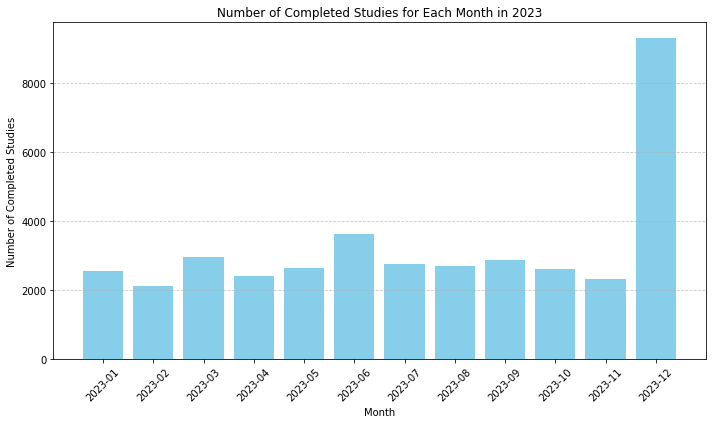

Table of Completed Studies for Each Month in 2023:
Month		Completed Studies
2023-01		2567
2023-02		2112
2023-03		2947
2023-04		2402
2023-05		2627
2023-06		3634
2023-07		2752
2023-08		2696
2023-09		2878
2023-10		2616
2023-11		2313
2023-12		9283


In [0]:
#Now, consider the fifth task: Plot number of completed studies for each month in 2023. You need to include yourvisualization as well as a table of all the values you have plotted for each month

#importing the required library: matplotlib.pyplot --> commonly used for creating plots and visualizations in Python.  
import matplotlib.pyplot as plt

# Extract completion dates from final_rdd_clinicaltrial_2023 in order to do the task
completion_dates = final_rdd_clinicaltrial_2023.map(lambda row: row[13])

# Filtering completion dates for 2023 by removing the None values
completion_dates_2023 = completion_dates.filter(lambda date: date is not None and date.startswith('2023'))

# Map each completion date to month and count occurrences so as to plot it
completed_studies_per_month = completion_dates_2023 \
    .map(lambda date: date[:7]) \
    .map(lambda month: (month, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .collect()

# Sort by month in order to get a client-friednly view
completed_studies_per_month.sort(key=lambda x: x[0])

# Extract month labels and counts
months = [entry[0] for entry in completed_studies_per_month]
counts = [entry[1] for entry in completed_studies_per_month]

# Plotting the data into a pyplot visualization
plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')
plt.title('Number of Completed Studies for Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table of values containing the completed study details
print("Table of Completed Studies for Each Month in 2023:")
print("Month\t\tCompleted Studies")
for month, count in completed_studies_per_month:
    print(f"{month}\t\t{count}")


In [0]:
final_rdd_clinicaltrial_2023.take(3)

Out[167]: [('Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'),
 ('NCT00237471',
  'Impact of Tight Glycaemic Control in Acute Myocardial Infarction',
  None,
  'TERMINATED',
  'Myocardial Infarct|Hyperglycemia',
  'DRUG: Insulin (tight blood glucose control)',
  'Melbourne Health',
  'National Health and Medical Research Council Australia|Bristol-Myers Squibb',
  '40.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT',
  '2005-10-01',
  '2006-05-01'),
 ('NCT02945371',
  'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life',
  'REV',
  'COMPLETED',
  'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced',
  'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavi